# Detection of peak in stationary signal using signal.find_peaks()

In [14]:
import os
import pandas as pd
import numpy as np
import datetime
from cs.csv2pd import *
from cs.cowsTreatment import creatingFarmFolder, all_equal, separatingCows, get_prominences, normal_fitting2, cuttingOutNas, farm2CSV2cows
import matplotlib.pyplot as plt
from scipy import stats, signal

Besides circadian oscillation, the variables recorded in cows from farms seem to have positive or negative peaks ~1x/month. 
These peaks are not detectable by time-frequency analysis methods, due to the lack of an oscillatory nature. 


Cow n.6601 , col: WALK
(-1159.0350050320037, 1175.5830075393785)


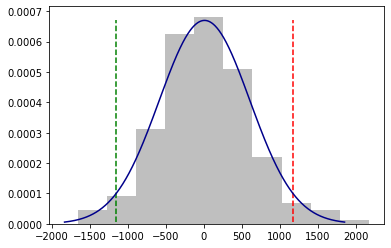

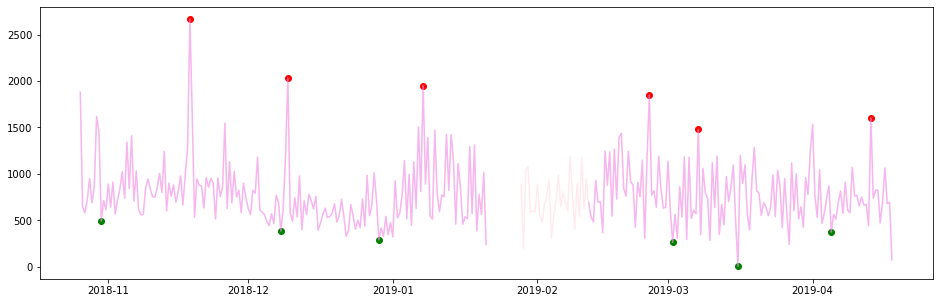

Cow n.6601 , col: SLEEP
(-1624.123941118682, 1632.5835986432953)


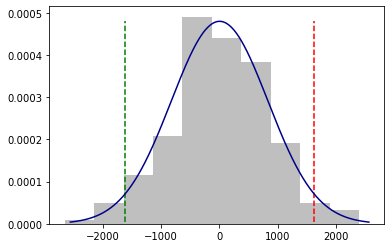

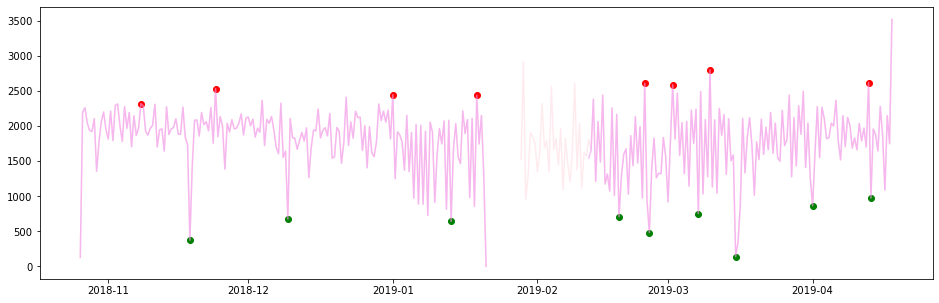

Cow n.6601 , col: EAT
(-883.8149769737224, 875.752853045645)


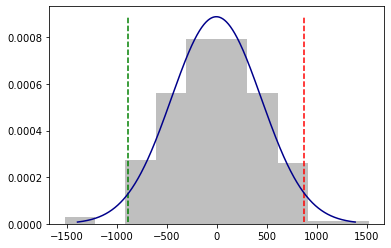

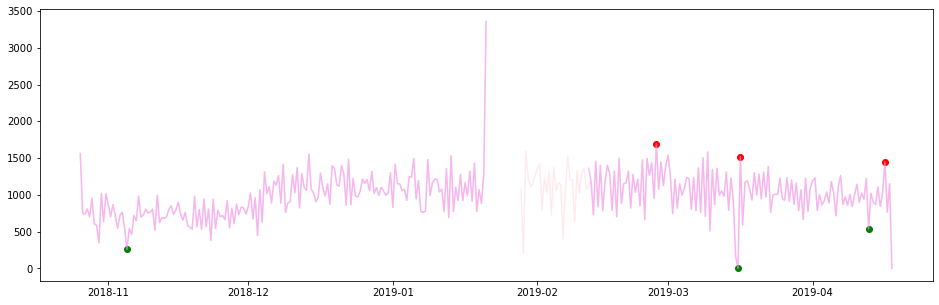

Cow n.6601 , col: ACTIVITY_LEVEL
(-808.4769263263191, 801.5858903546879)


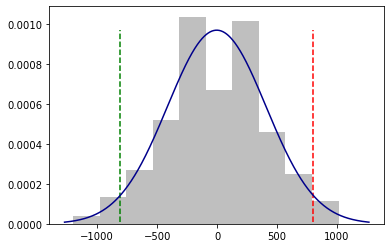

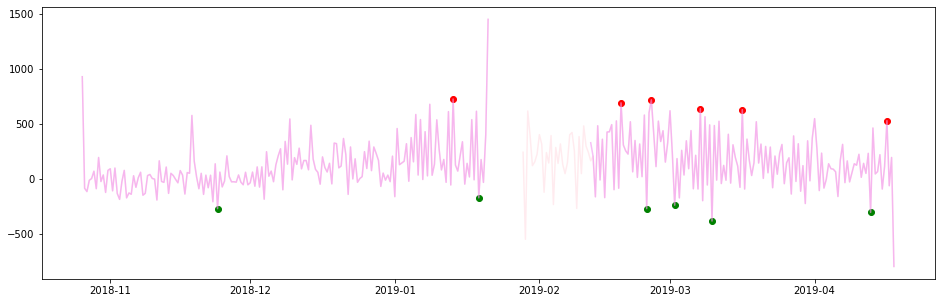

Cow n.6610 , col: WALK
(-827.4145413168442, 841.8646033909183)


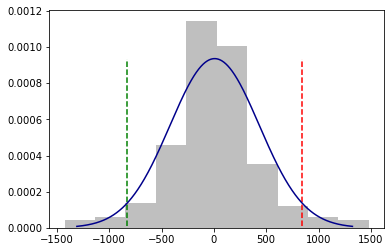

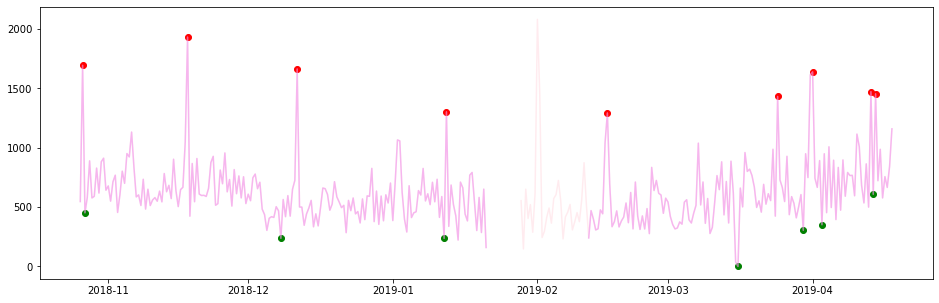

Cow n.6610 , col: SLEEP
(-1422.6962852496217, 1395.8134736904817)


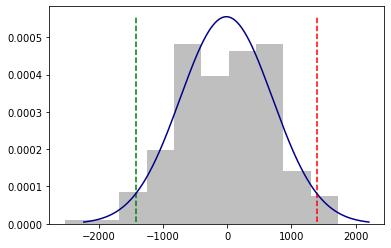

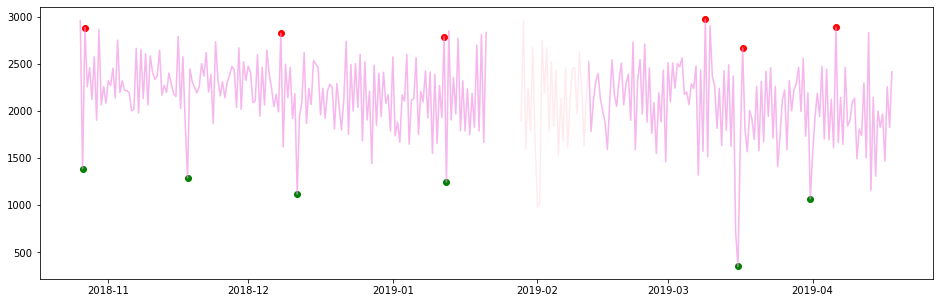

Cow n.6610 , col: EAT
(-945.9586977493323, 961.9423825149572)


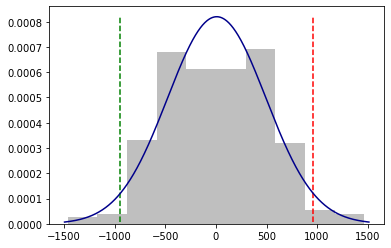

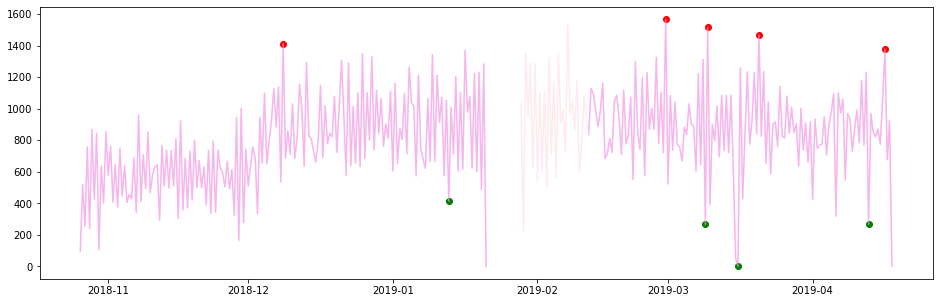

Cow n.6610 , col: ACTIVITY_LEVEL
(-737.4498398683301, 748.3044297712171)


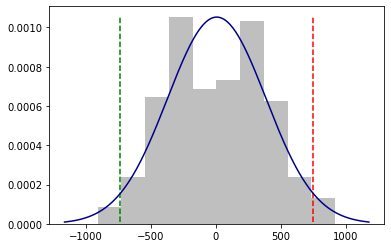

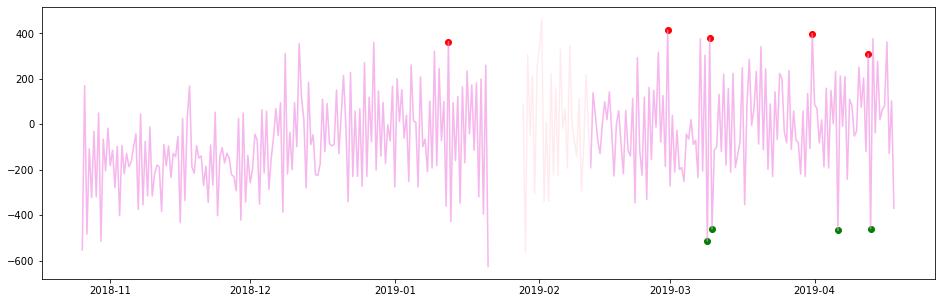

Cow n.6612 , col: WALK
(-735.0925707965273, 745.0817200718895)


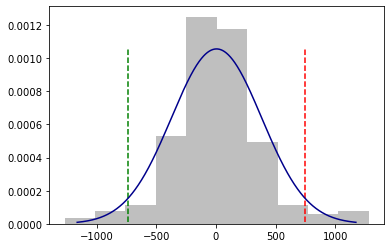

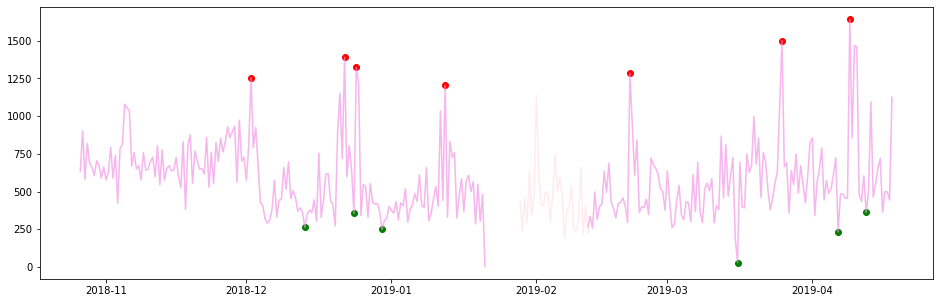

Cow n.6612 , col: SLEEP
(-1281.35834849787, 1276.8736273762768)


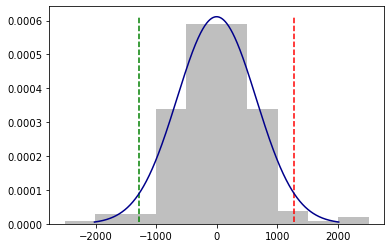

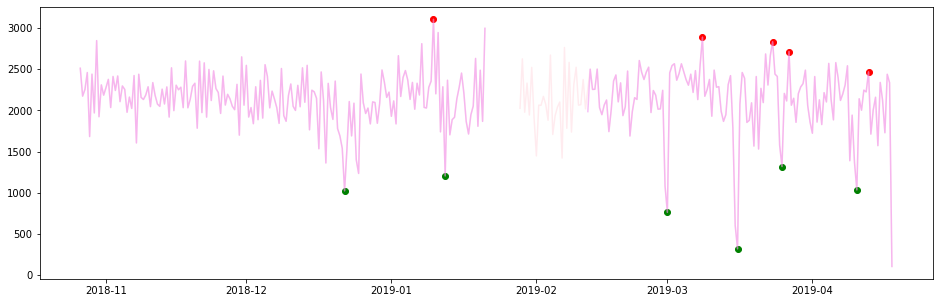

Cow n.6612 , col: EAT
(-979.5342241318276, 977.9707345742145)


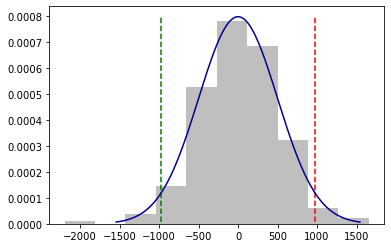

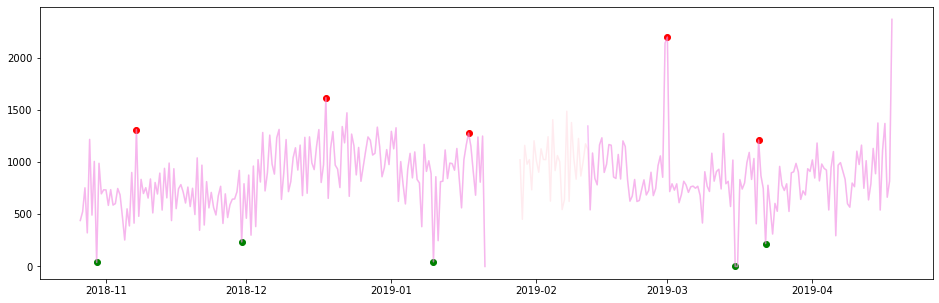

Cow n.6612 , col: ACTIVITY_LEVEL
(-687.5998175703963, 689.243818333117)


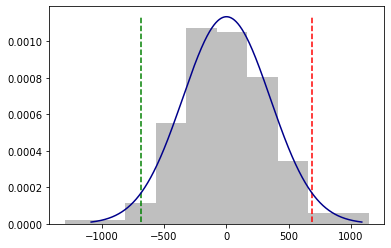

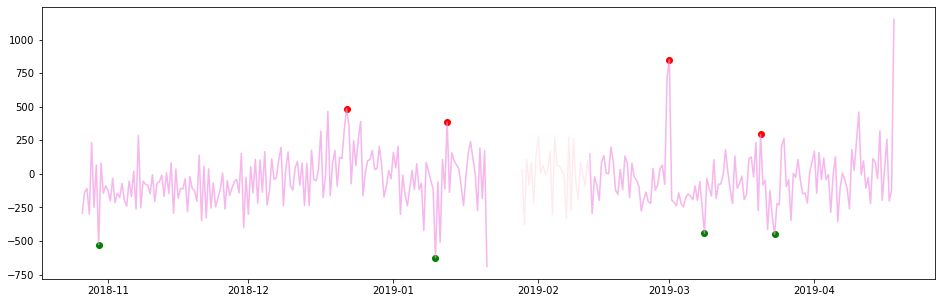

Cow n.6613 , col: WALK
(-1010.3175763758329, 1023.5357471487798)


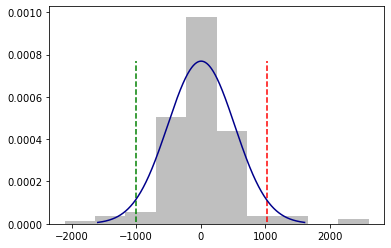

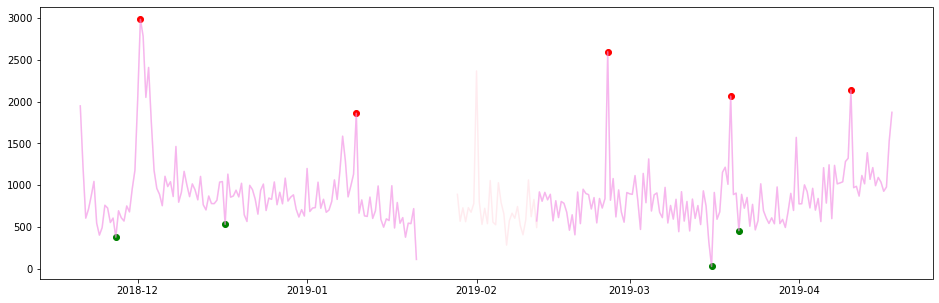

Cow n.6613 , col: SLEEP
(-1465.2957646520674, 1454.9761025011464)


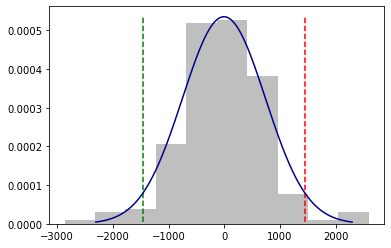

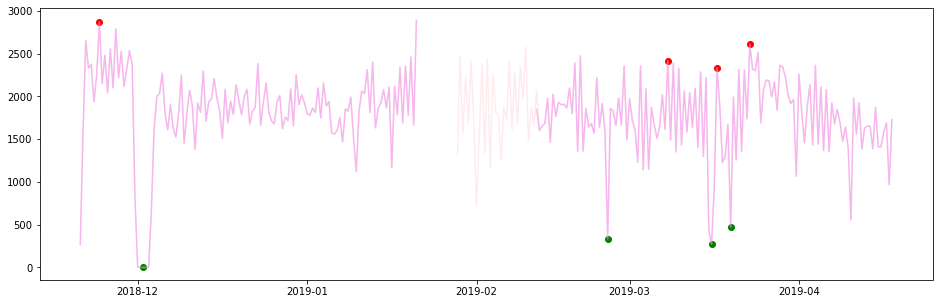

Cow n.6613 , col: EAT
(-954.6927331338374, 965.3029937960147)


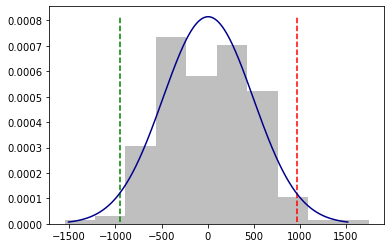

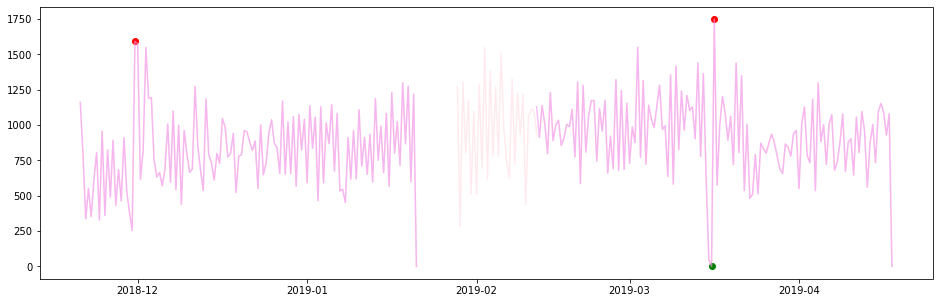

Cow n.6613 , col: ACTIVITY_LEVEL
(-748.2516362503703, 754.063632925763)


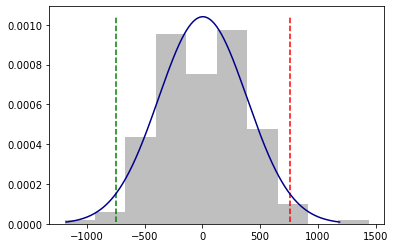

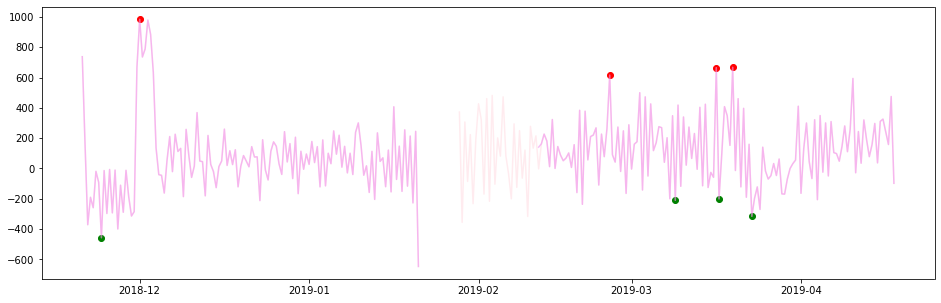

Cow n.6621 , col: WALK
(-848.9562878758474, 871.2761493341808)


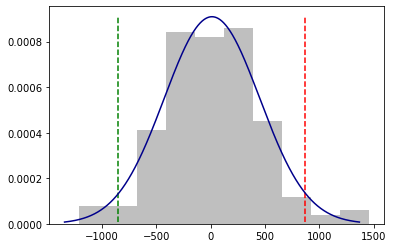

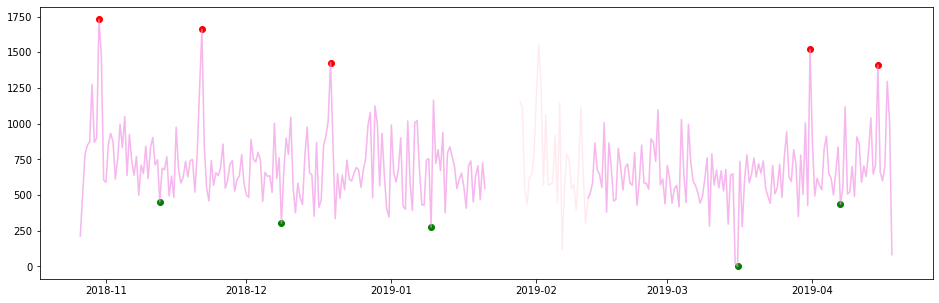

Cow n.6621 , col: SLEEP
(-1282.1356474636964, 1264.5959339111305)


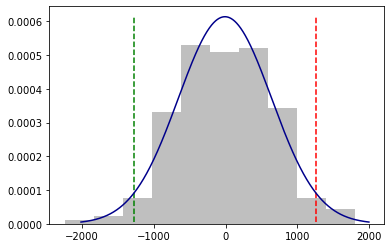

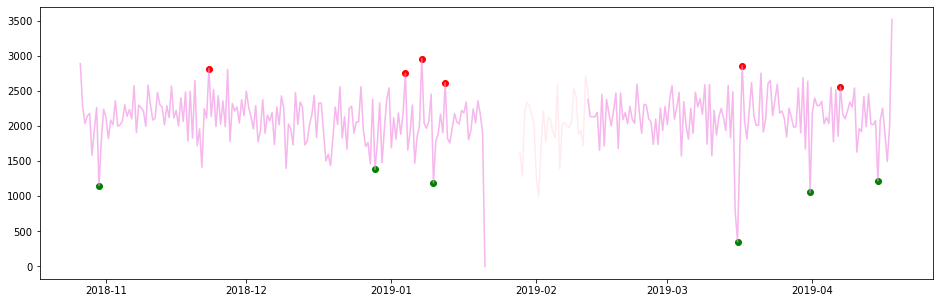

Cow n.6621 , col: EAT
(-860.2774958182093, 863.0862938201586)


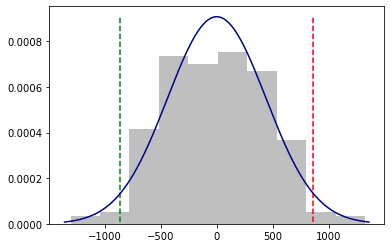

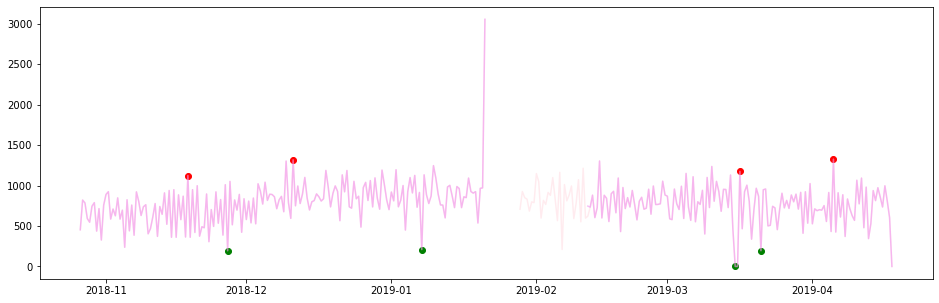

Cow n.6621 , col: ACTIVITY_LEVEL
(-648.3322606324983, 652.6926366060433)


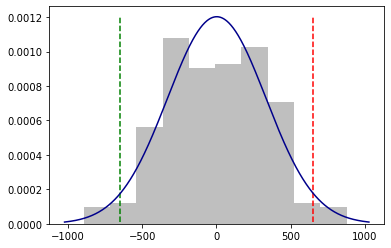

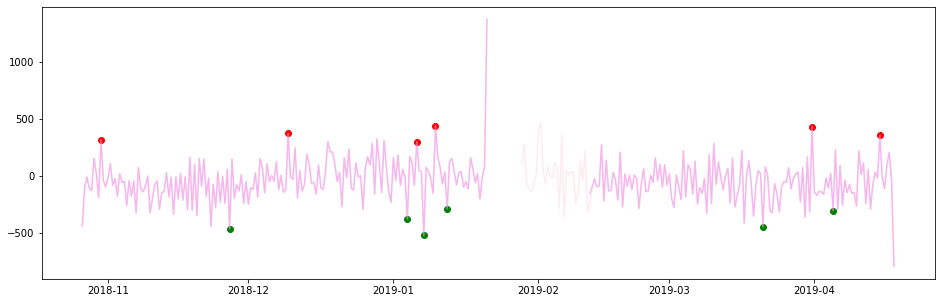

Cow n.6629 , col: WALK
(-1149.0232521092407, 1176.751506236225)


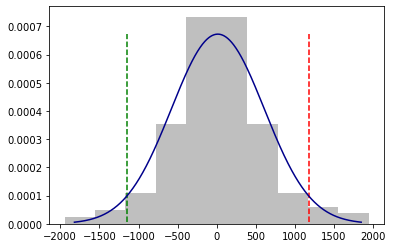

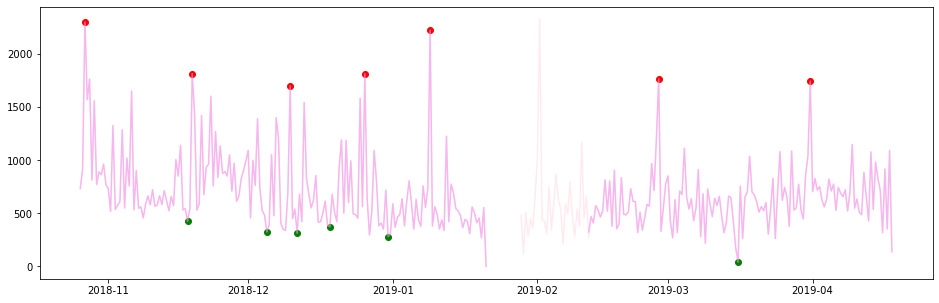

Cow n.6629 , col: SLEEP
(-1405.164754302903, 1386.3998947686964)


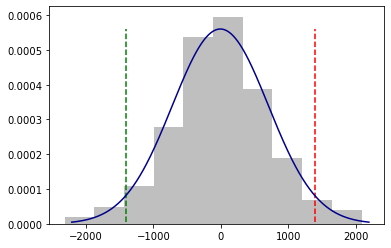

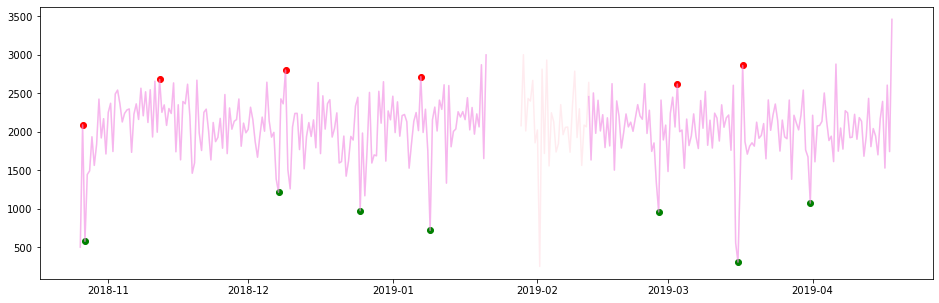

Cow n.6629 , col: EAT
(-888.4374746661257, 892.7244583237133)


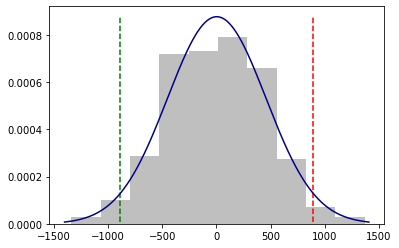

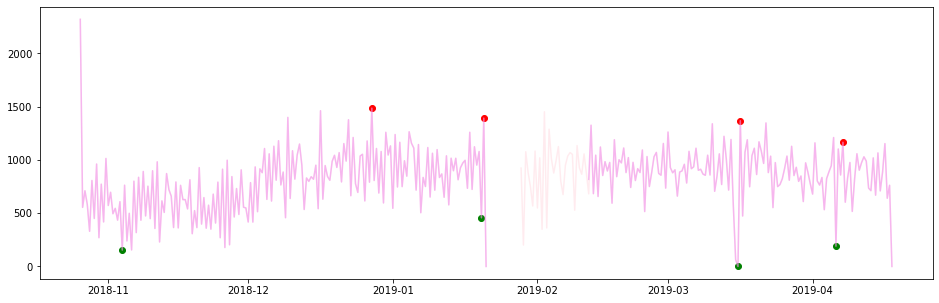

Cow n.6629 , col: ACTIVITY_LEVEL
(-674.2359018289745, 679.2861698233486)


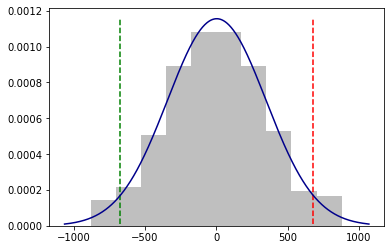

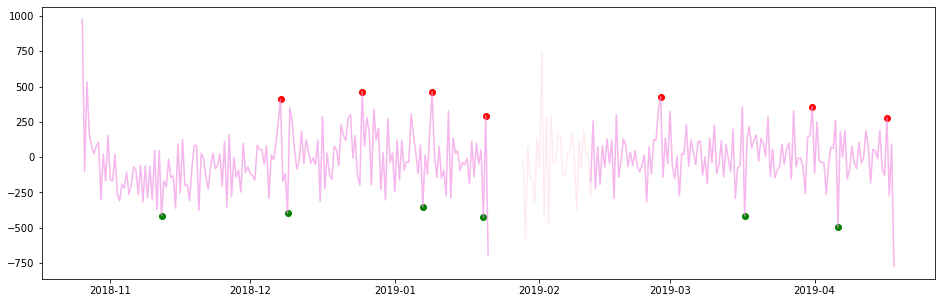

Cow n.6633 , col: WALK
(-1193.5703280255761, 1206.8881632868647)


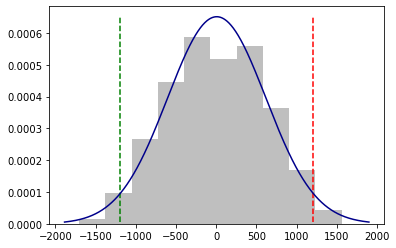

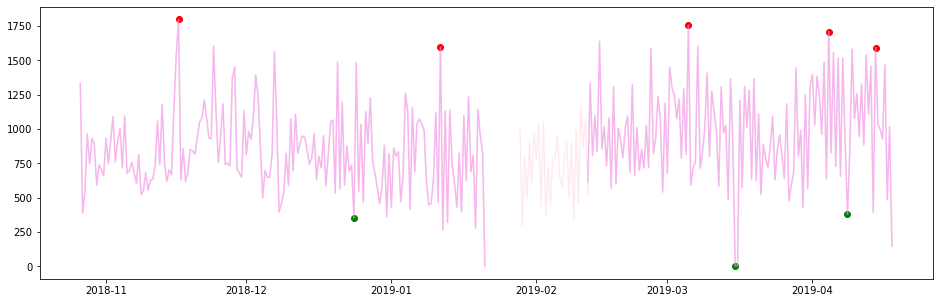

Cow n.6633 , col: SLEEP
(-1724.3482076166172, 1701.7946001634848)


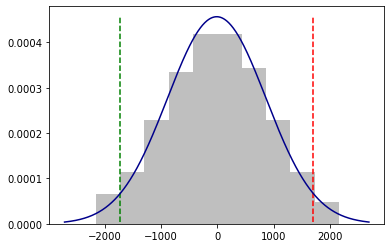

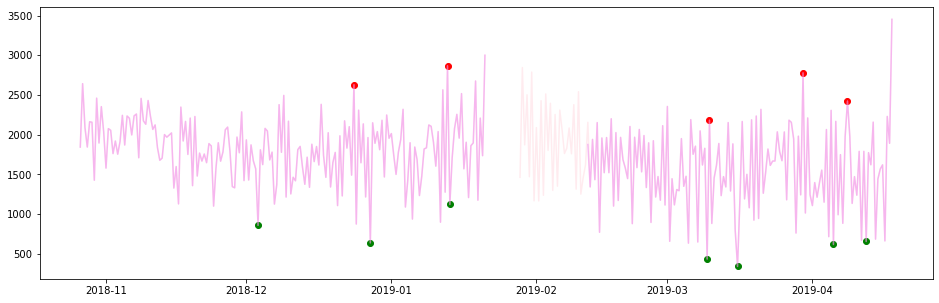

Cow n.6633 , col: EAT
(-995.5548839888637, 1013.0032826061478)


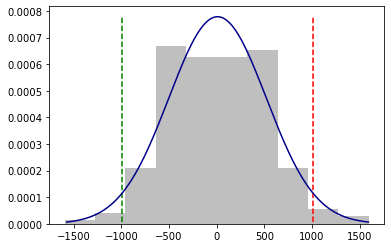

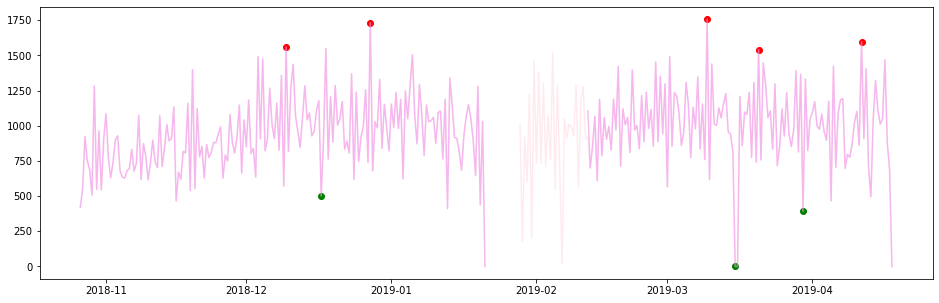

Cow n.6633 , col: ACTIVITY_LEVEL
(-859.1714605721551, 871.9729217233768)


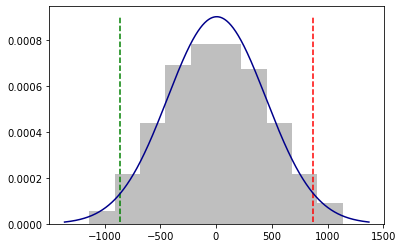

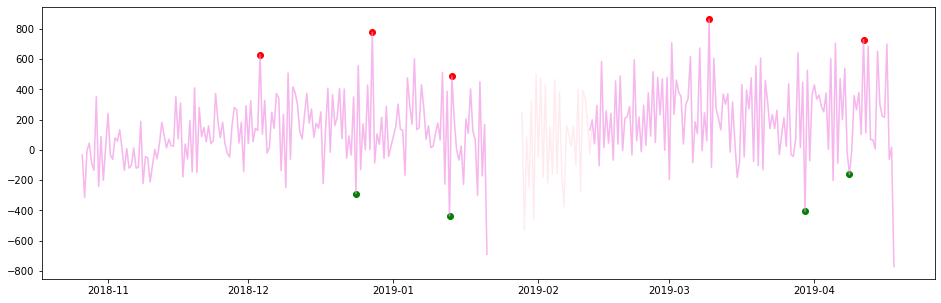

Cow n.6634 , col: WALK
(-951.4176507019666, 950.7638844967674)


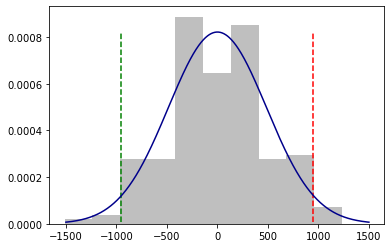

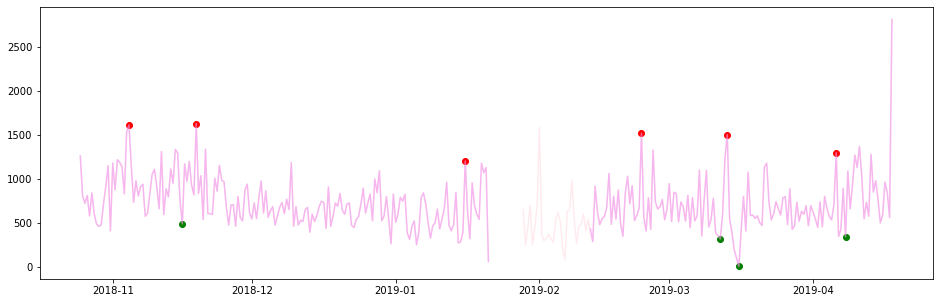

Cow n.6634 , col: SLEEP
(-1361.1282204921147, 1362.1022343046586)


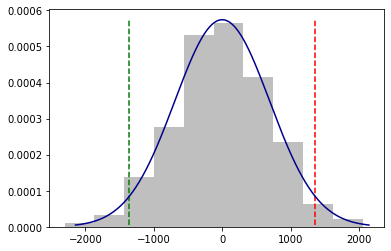

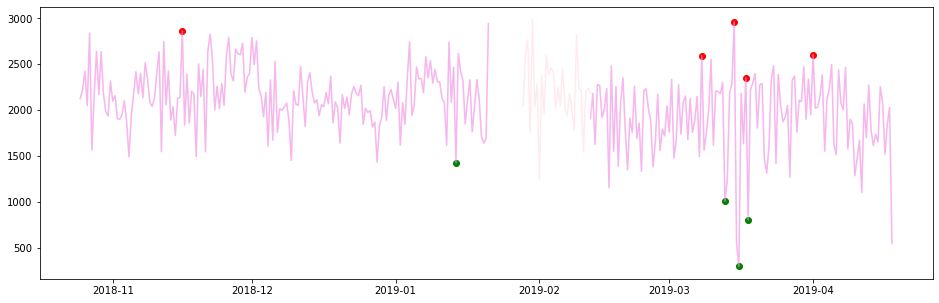

Cow n.6634 , col: EAT
(-902.8243673144927, 915.9718983232101)


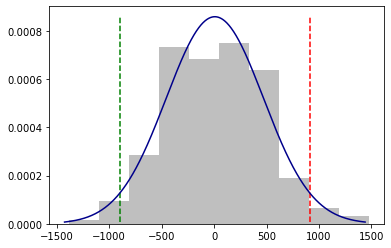

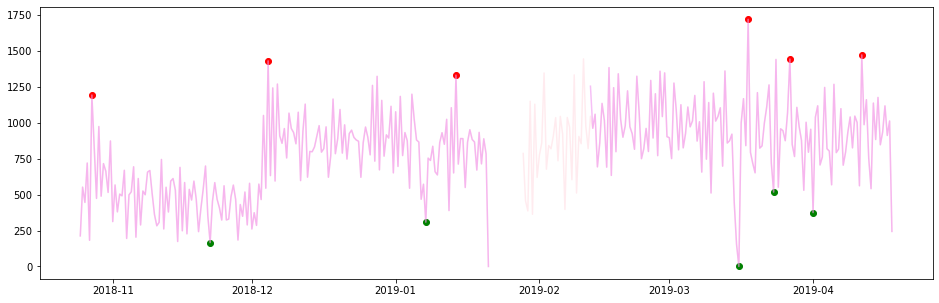

Cow n.6634 , col: ACTIVITY_LEVEL
(-691.0135404485084, 693.087525853846)


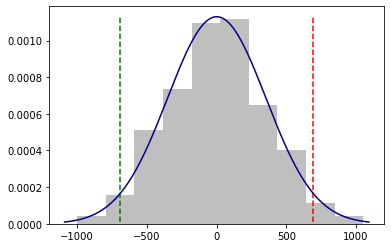

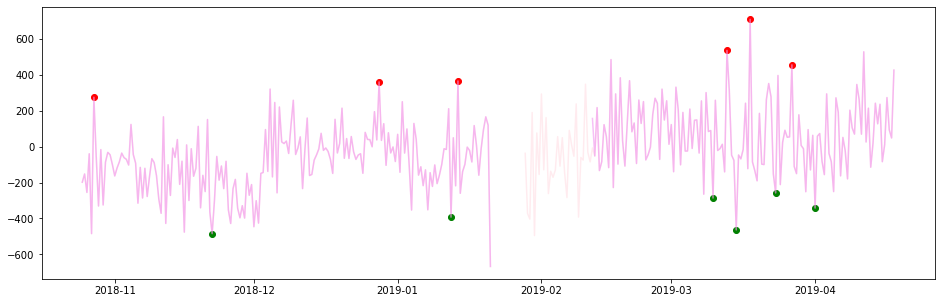

Cow n.6637 , col: WALK
(-1447.8276245534112, 1465.5933257546126)


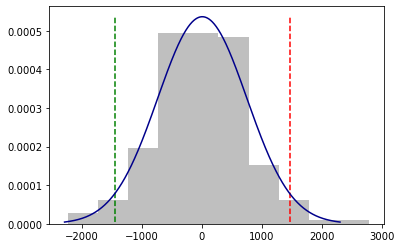

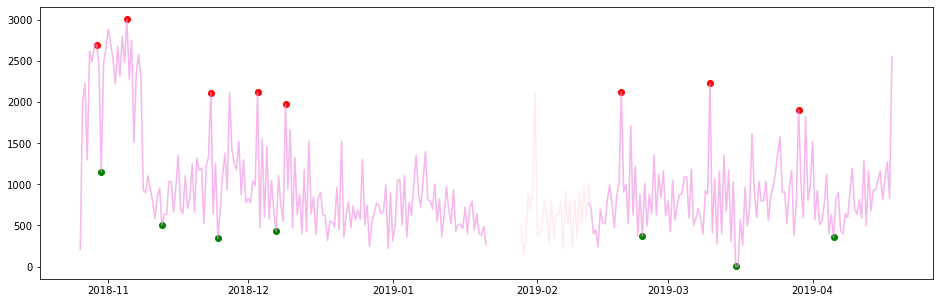

Cow n.6637 , col: SLEEP
(-1881.732256602601, 1868.530996744445)


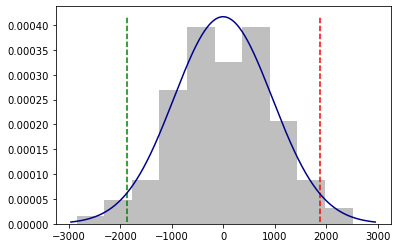

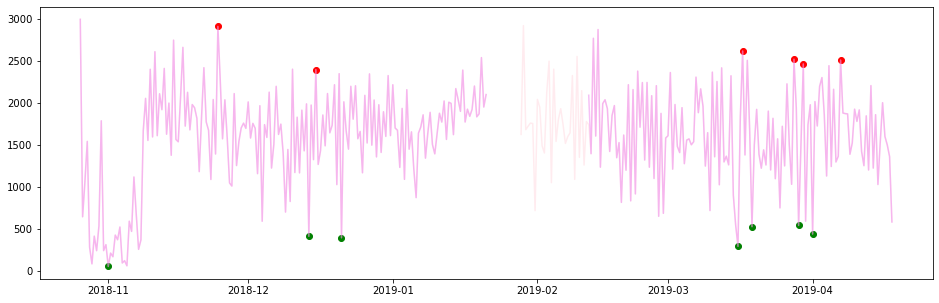

Cow n.6637 , col: EAT
(-1142.729013527679, 1150.1355908725563)


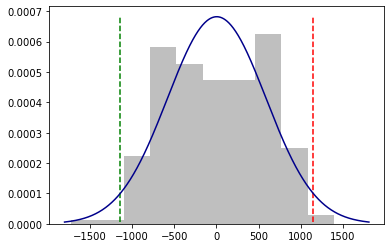

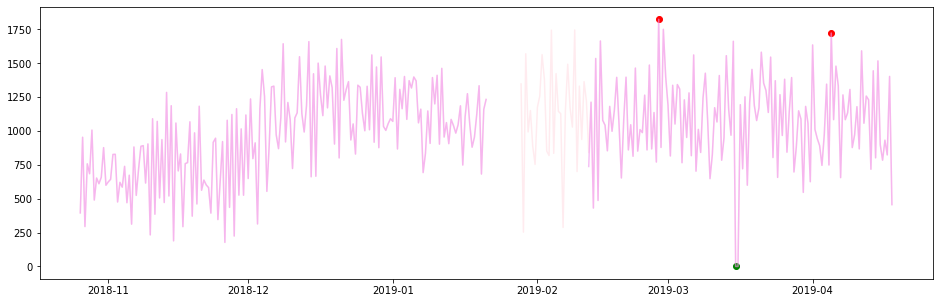

Cow n.6637 , col: ACTIVITY_LEVEL
(-938.7139646371327, 945.3407148417107)


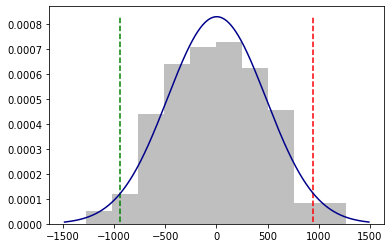

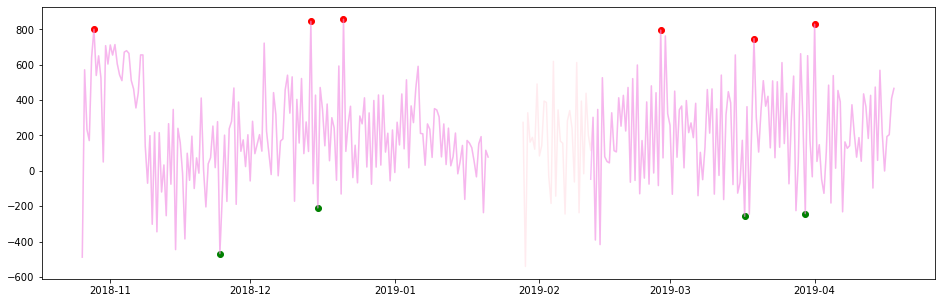

Cow n.6638 , col: WALK
(-826.1271288080679, 833.1141294747347)


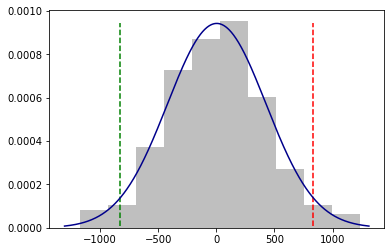

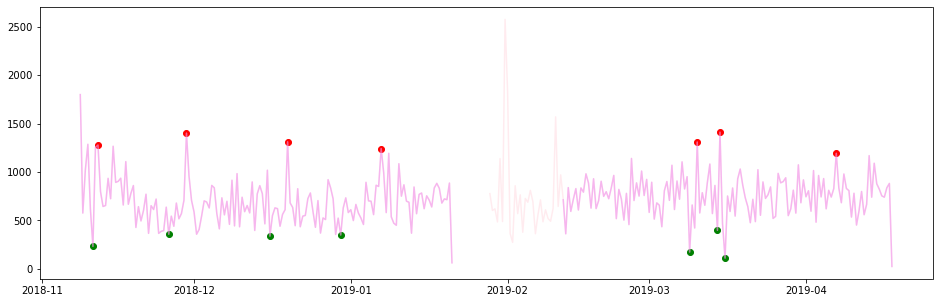

Cow n.6638 , col: SLEEP
(-1486.0603214776893, 1463.227472816975)


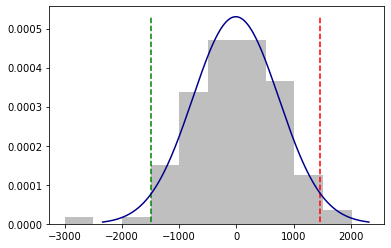

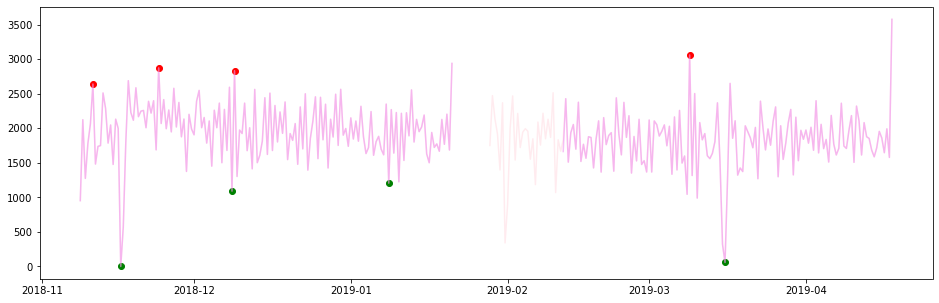

Cow n.6638 , col: EAT
(-1072.2976923752628, 1093.6417781572534)


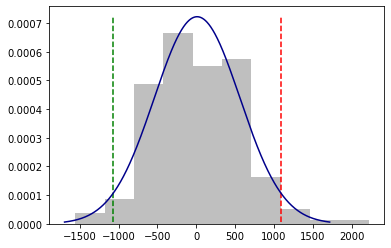

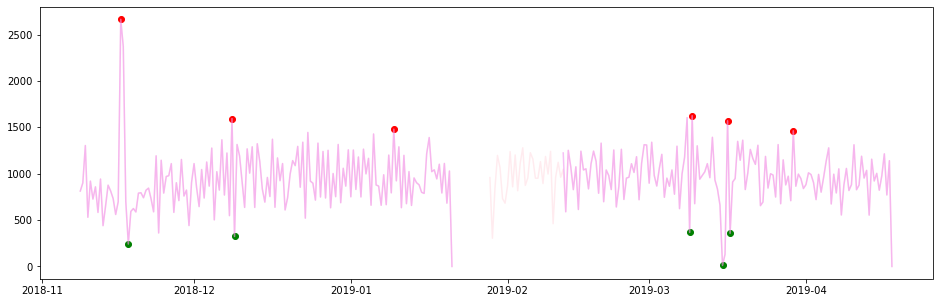

Cow n.6638 , col: ACTIVITY_LEVEL
(-791.6901363021557, 802.2959533803269)


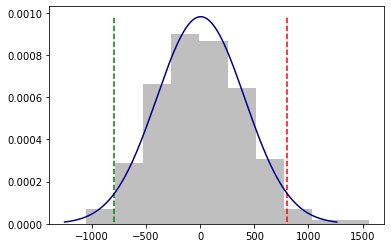

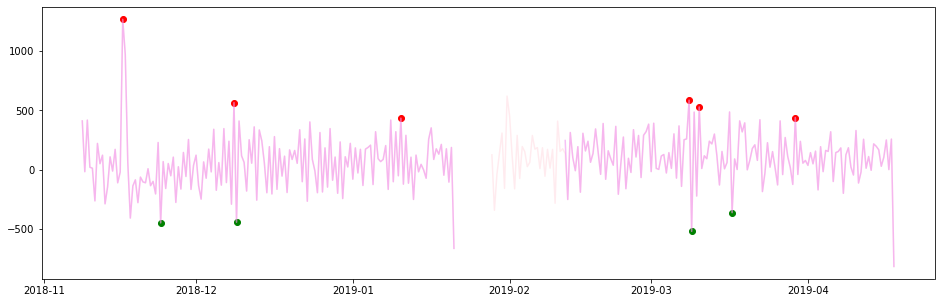

Cow n.6643 , col: WALK
(-752.3826113853186, 789.0923610476882)


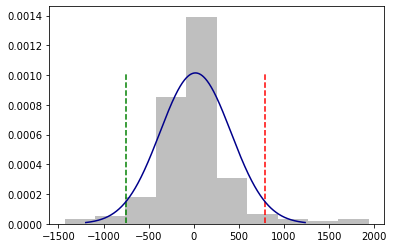

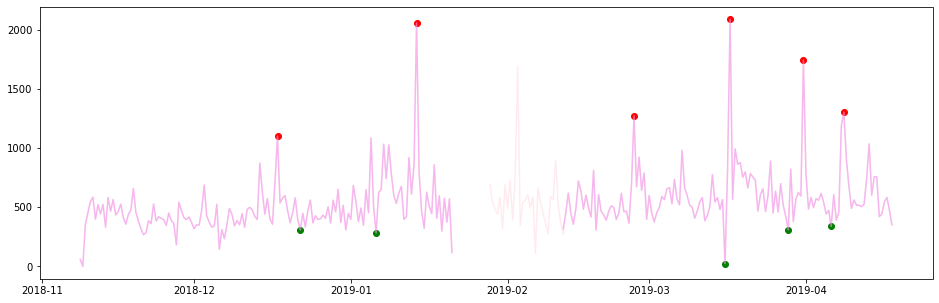

Cow n.6643 , col: SLEEP
(-1412.1883043773382, 1391.881511369208)


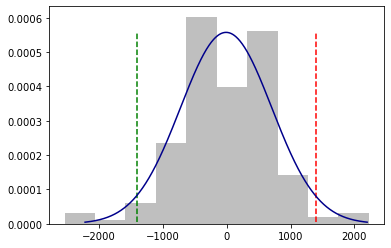

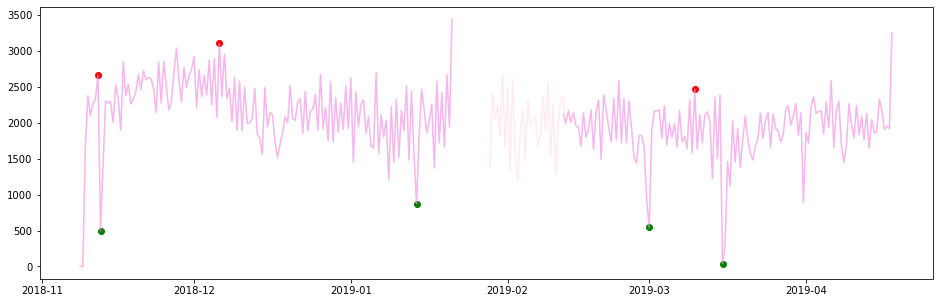

Cow n.6643 , col: EAT
(-1109.1555200806456, 1122.1331339567337)


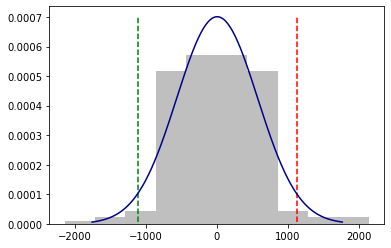

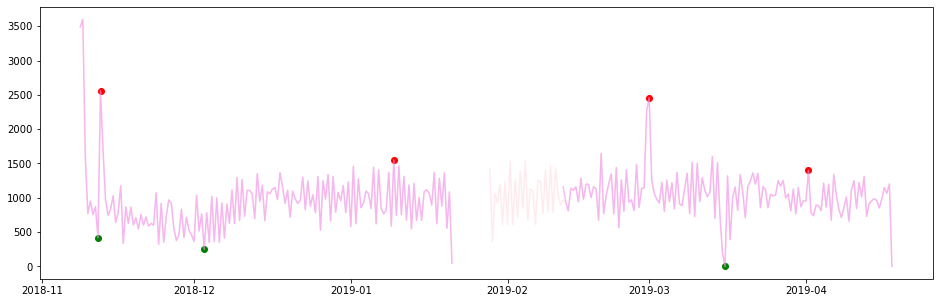

Cow n.6643 , col: ACTIVITY_LEVEL
(-767.6575420776645, 777.0398812840889)


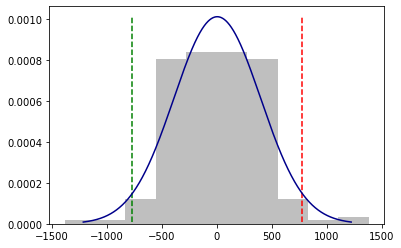

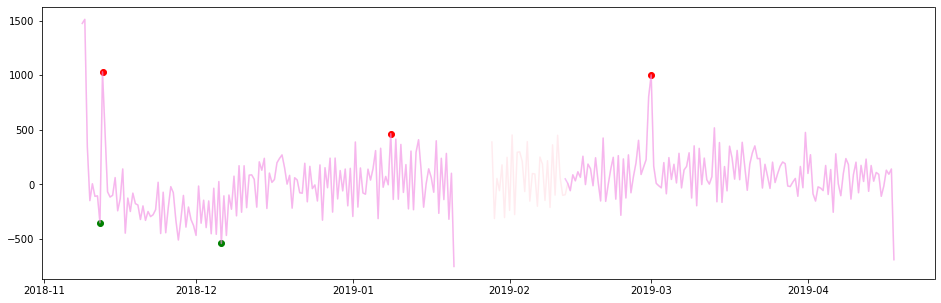

Cow n.6646 , col: WALK
(-988.6416737645546, 995.376242127992)


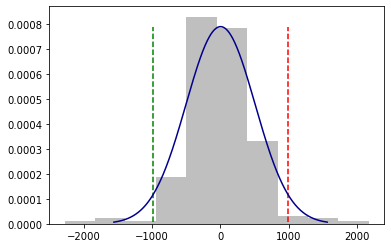

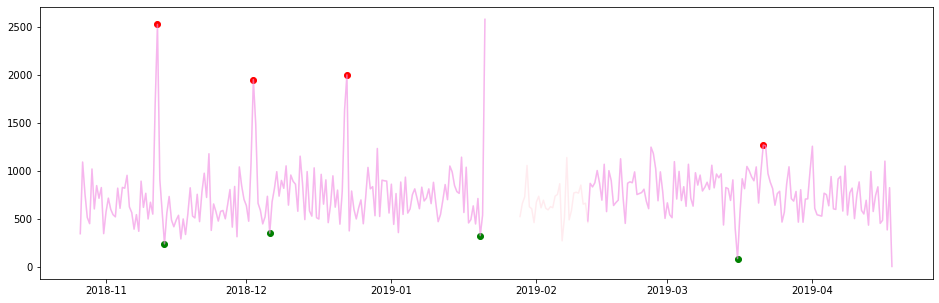

Cow n.6646 , col: SLEEP
(-1538.8769352269767, 1529.5742221003618)


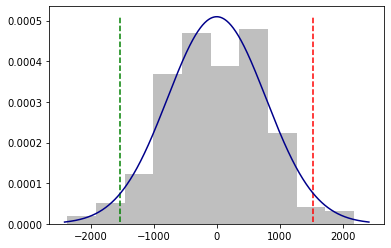

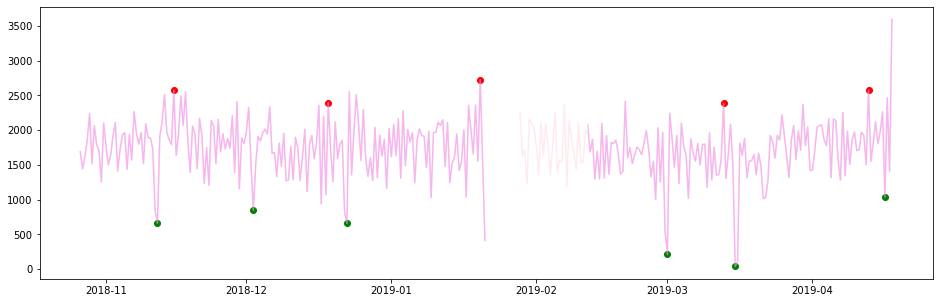

Cow n.6646 , col: EAT
(-999.4694750718504, 1017.170995296022)


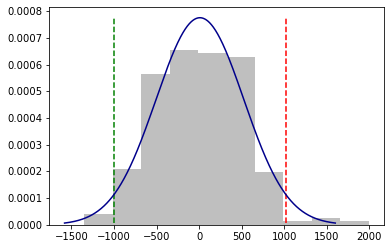

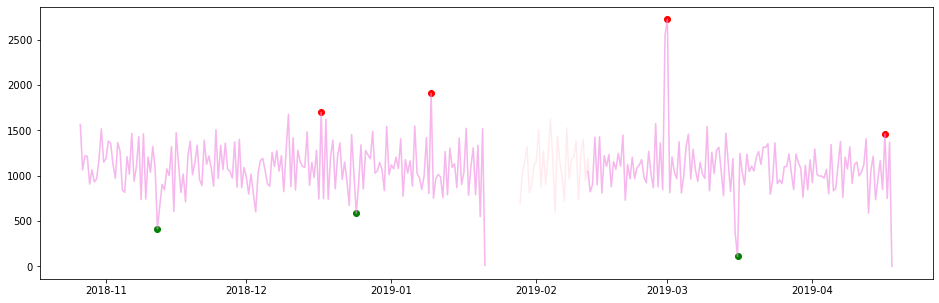

Cow n.6646 , col: ACTIVITY_LEVEL
(-782.3525354027687, 790.0272541069797)


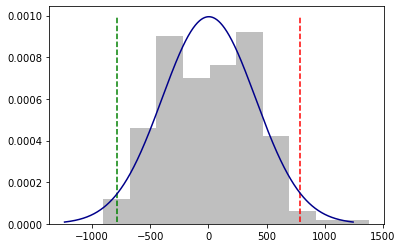

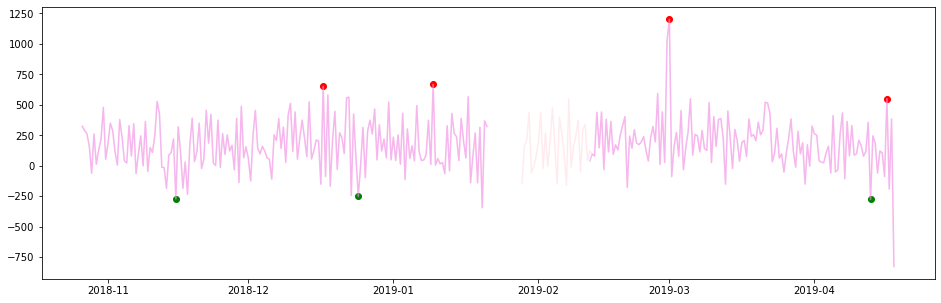

Cow n.6656 , col: WALK
(-1080.9954814656542, 1096.942824132321)


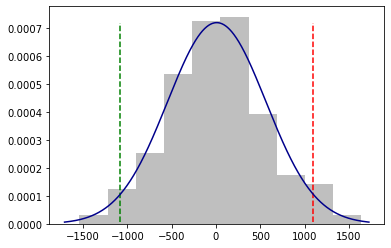

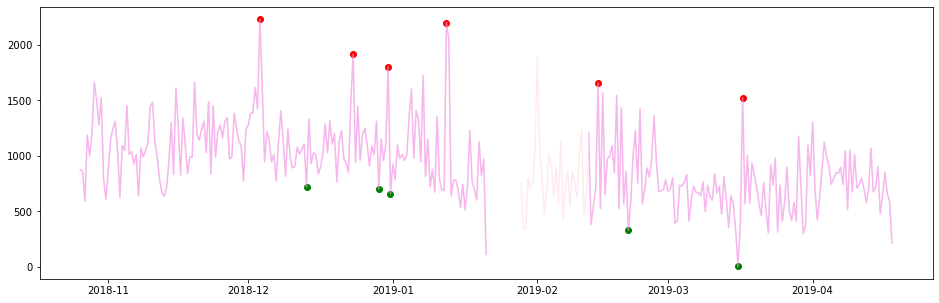

Cow n.6656 , col: SLEEP
(-1523.2626637213145, 1512.0642217516177)


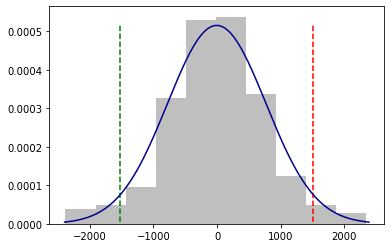

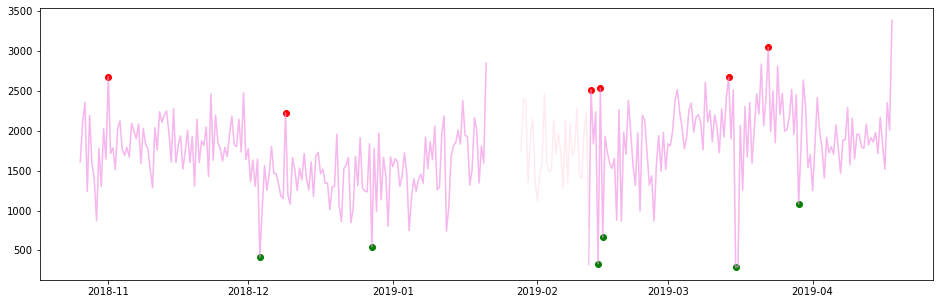

Cow n.6656 , col: EAT
(-908.7808822051419, 916.4421147808995)


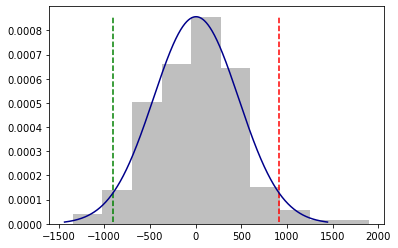

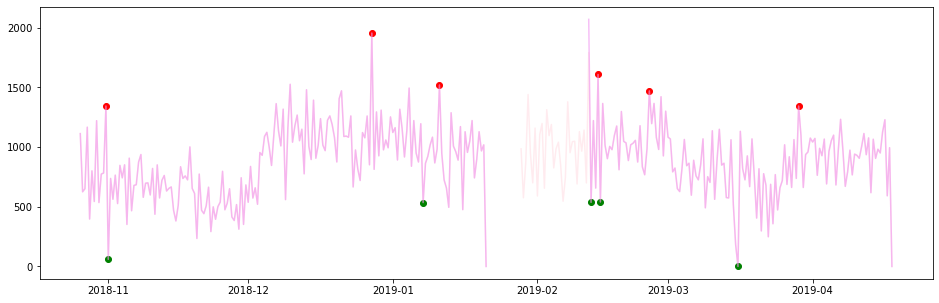

Cow n.6656 , col: ACTIVITY_LEVEL
(-751.1479654632362, 756.8535351028759)


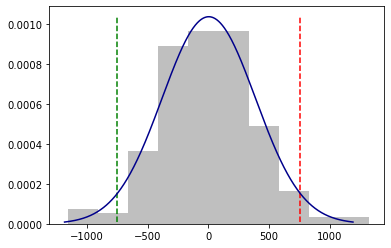

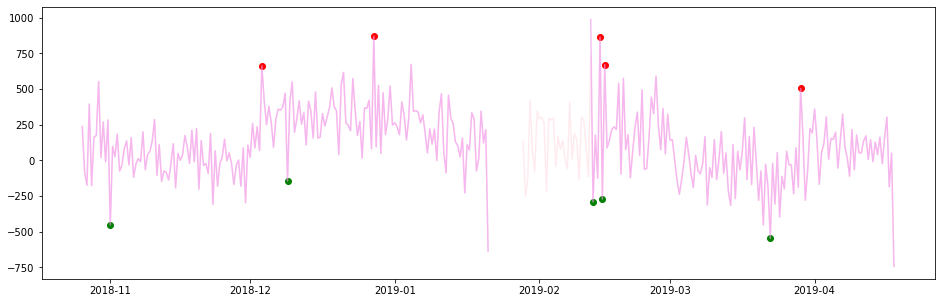

Cow n.6664 , col: WALK
(-1132.4153254059877, 1156.186499648412)


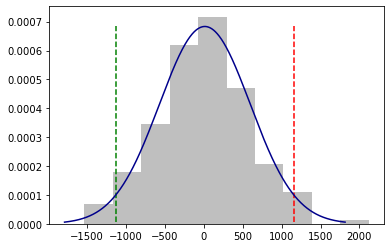

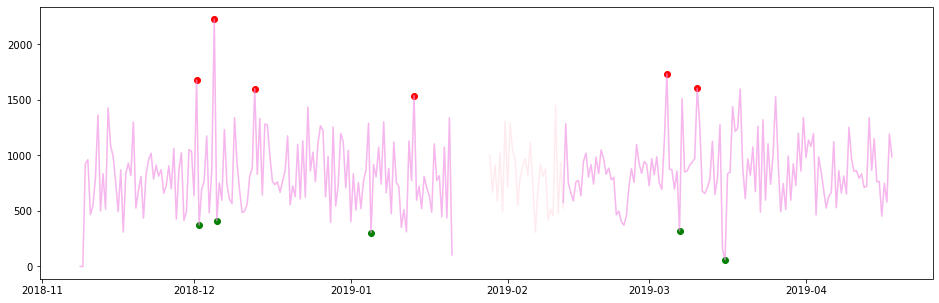

Cow n.6664 , col: SLEEP
(-1847.0978463631795, 1841.625591844661)


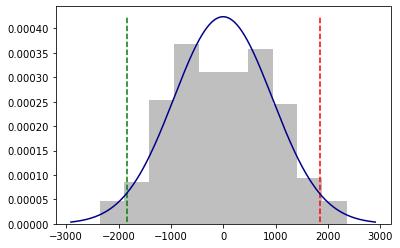

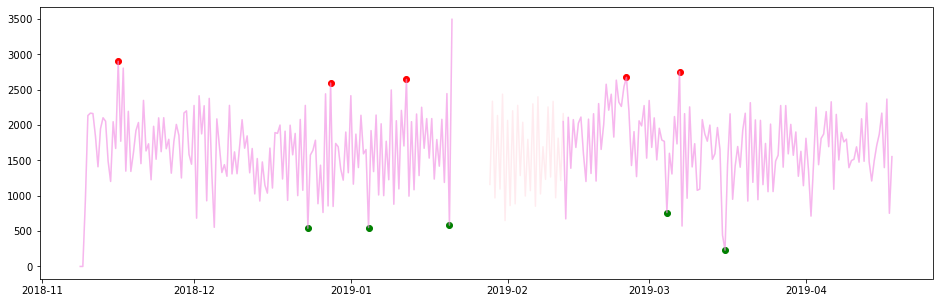

Cow n.6664 , col: EAT
(-1226.9245310108668, 1225.410030962974)


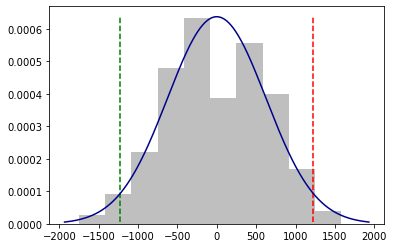

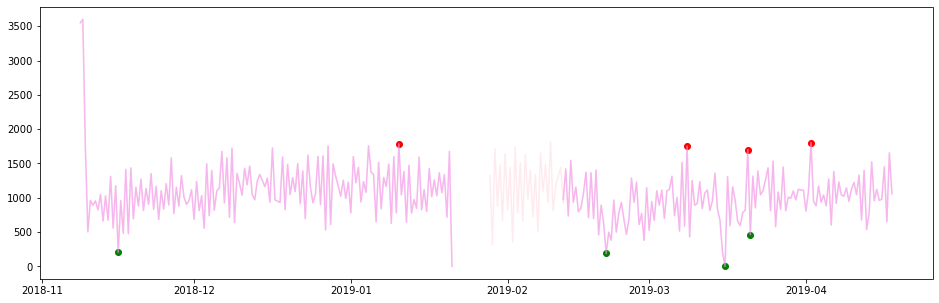

Cow n.6664 , col: ACTIVITY_LEVEL
(-970.2314619049137, 971.3692006940876)


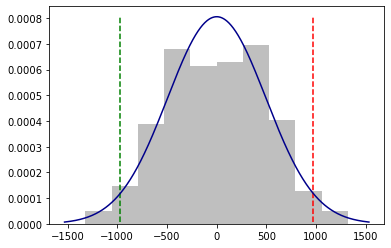

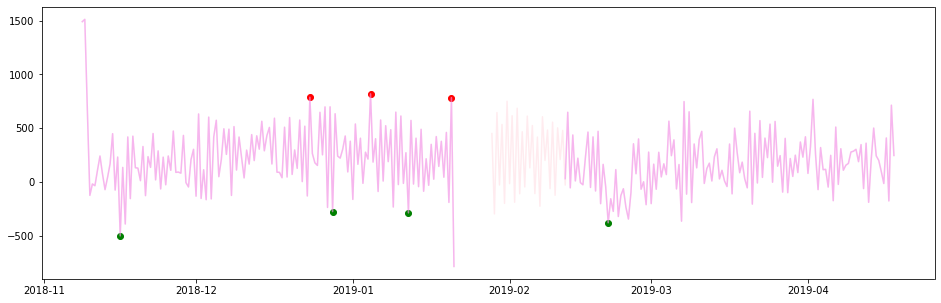

Cow n.6674 , col: WALK
(-1054.2744696531943, 1082.1451582036736)


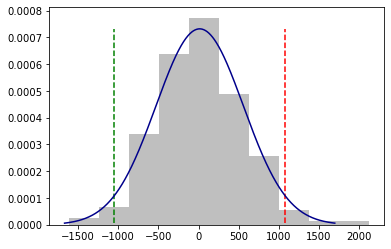

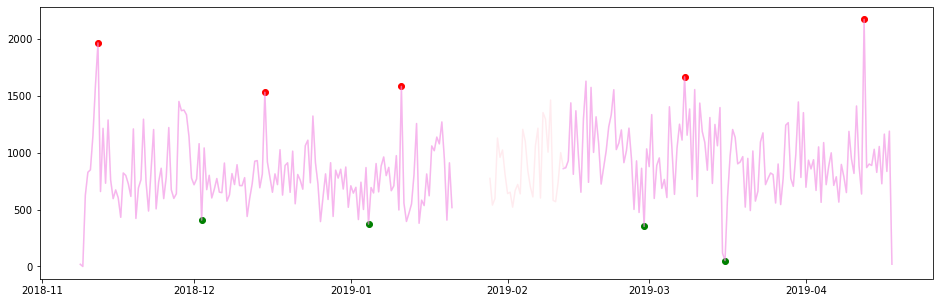

Cow n.6674 , col: SLEEP
(-1438.9474798271558, 1458.632004952784)


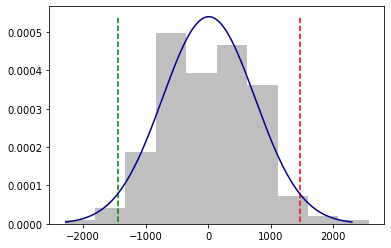

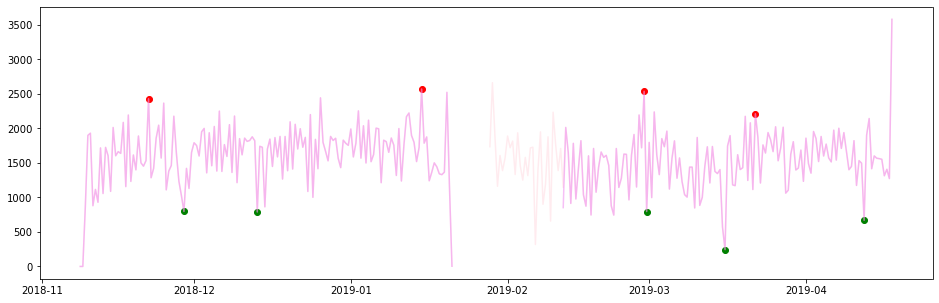

Cow n.6674 , col: EAT
(-1159.770678306839, 1135.8292206225194)


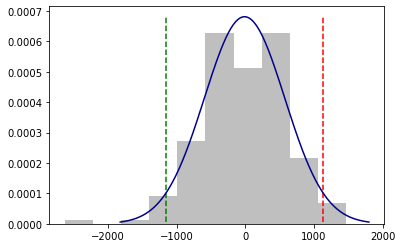

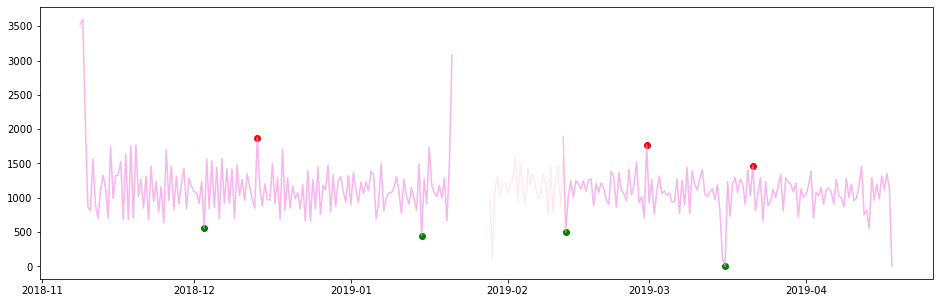

Cow n.6674 , col: ACTIVITY_LEVEL
(-789.4966154796667, 773.6977162944814)


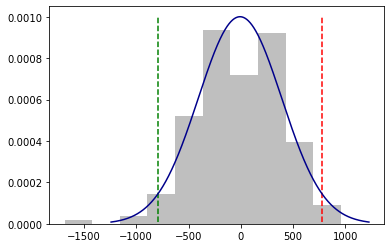

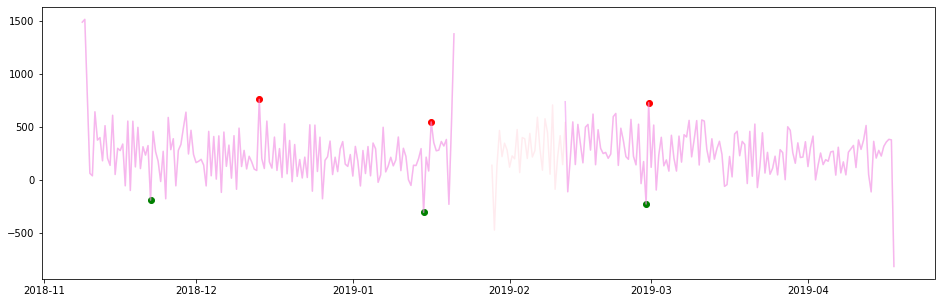

Cow n.6675 , col: WALK
(-1052.3218179689034, 1062.3916792168507)


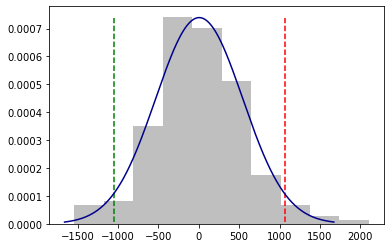

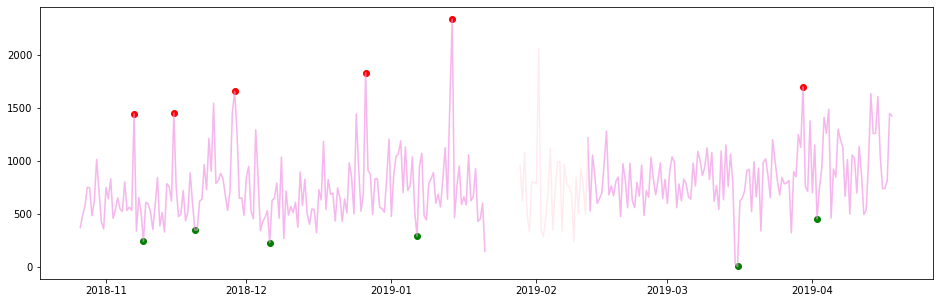

Cow n.6675 , col: SLEEP
(-1615.1232950071865, 1644.4752573304188)


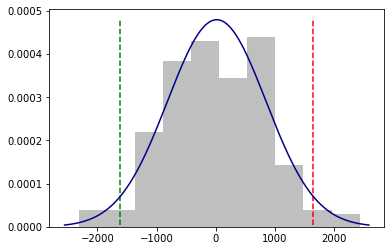

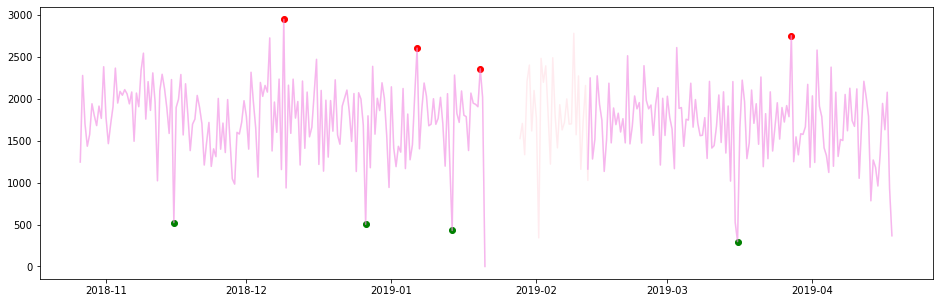

Cow n.6675 , col: EAT
(-1088.2709031589013, 1062.853016021764)


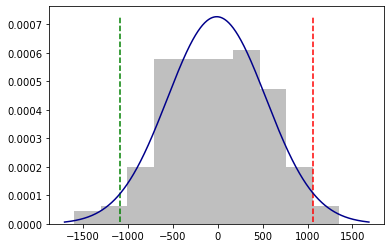

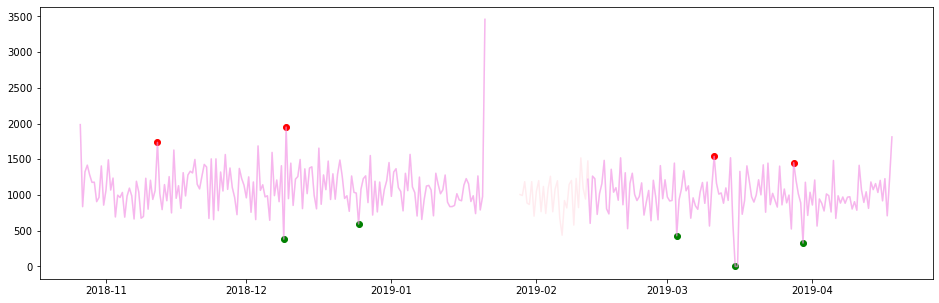

Cow n.6675 , col: ACTIVITY_LEVEL
(-845.5831022735991, 828.9169719923799)


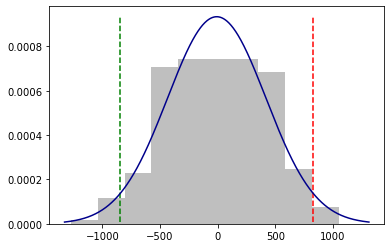

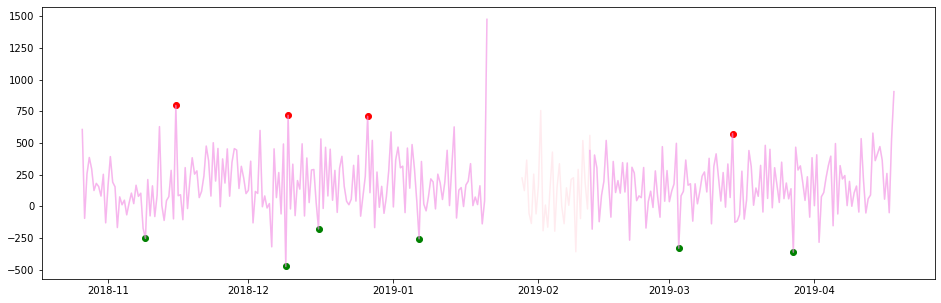

Cow n.6683 , col: WALK
(-808.7940142249907, 825.0896844968582)


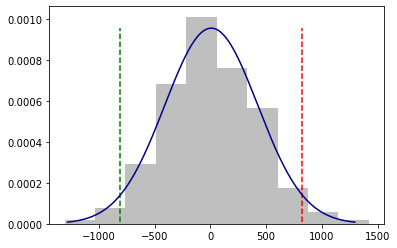

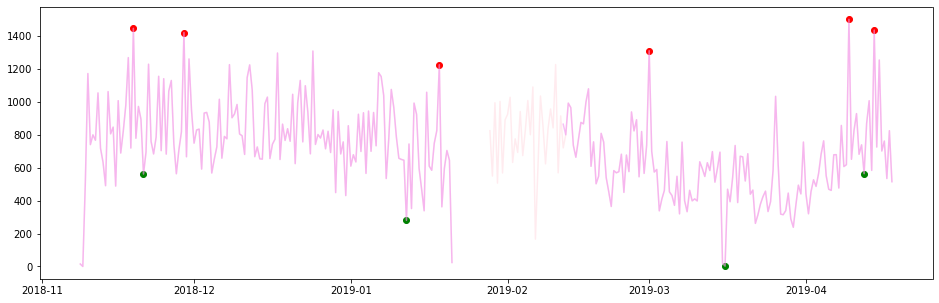

Cow n.6683 , col: SLEEP
(-1309.115487551275, 1297.7749894220235)


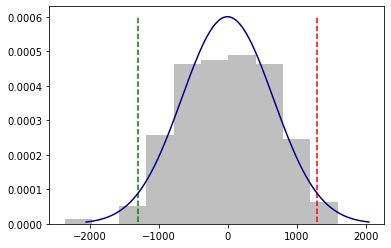

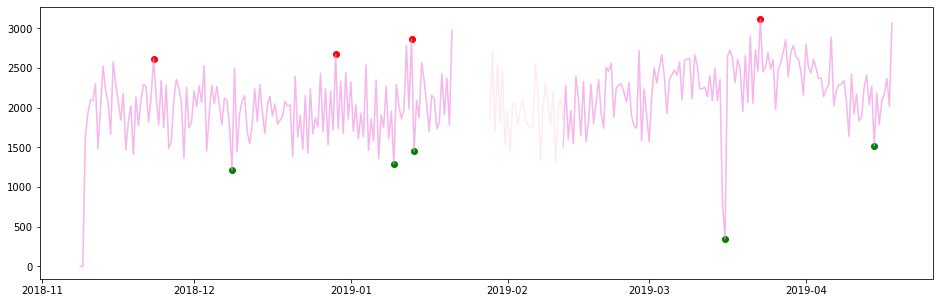

Cow n.6683 , col: EAT
(-956.3539403465007, 957.7728873470224)


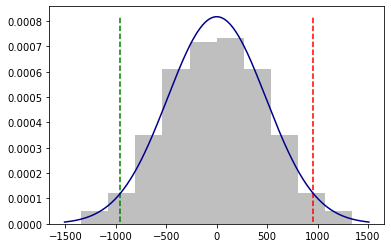

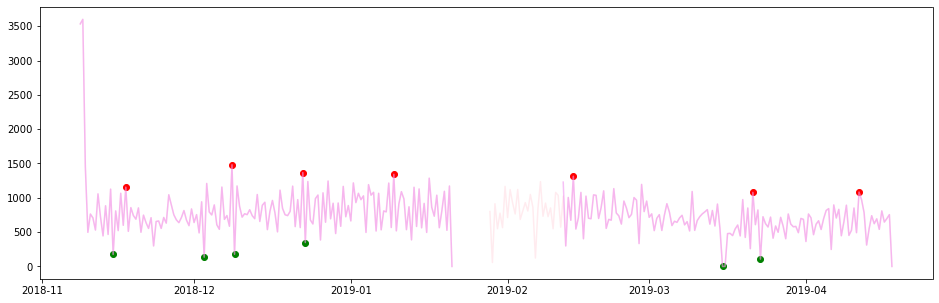

Cow n.6683 , col: ACTIVITY_LEVEL
(-693.5063071995723, 693.8067632887896)


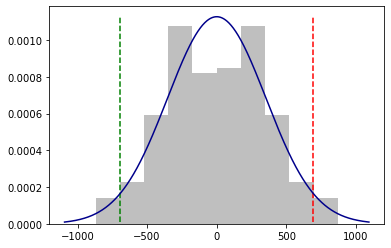

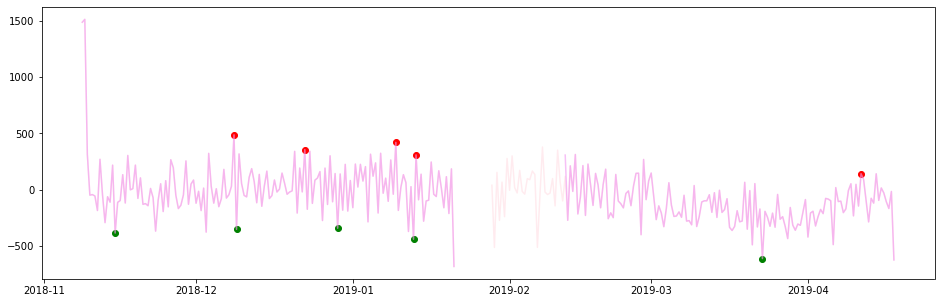

Cow n.6686 , col: WALK
(-1200.7848302750826, 1206.1582054582327)


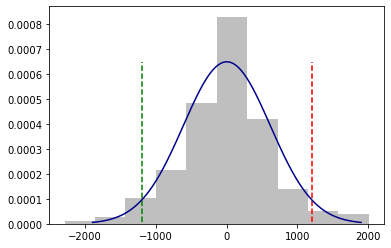

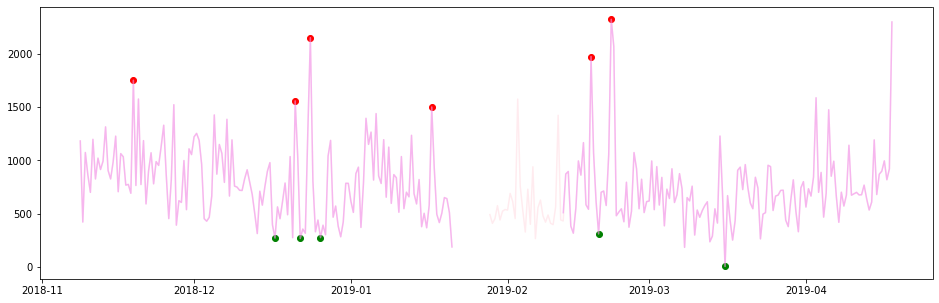

Cow n.6686 , col: SLEEP
(-1787.2898282842448, 1811.8465411047578)


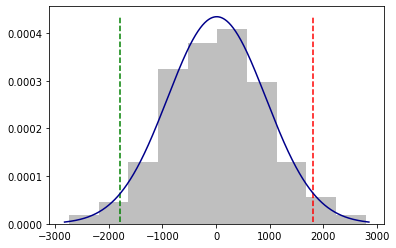

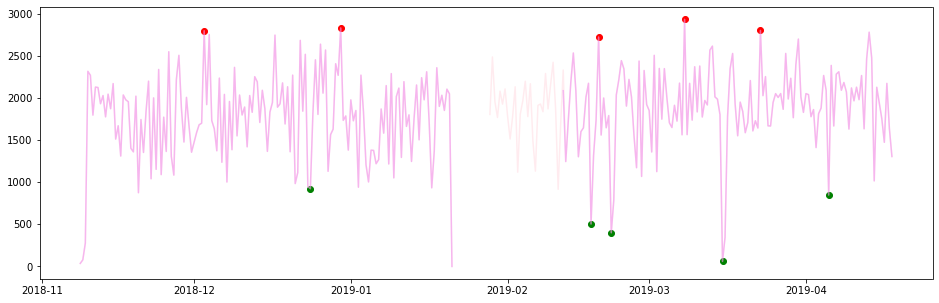

Cow n.6686 , col: EAT
(-1177.458383835068, 1164.0316299180174)


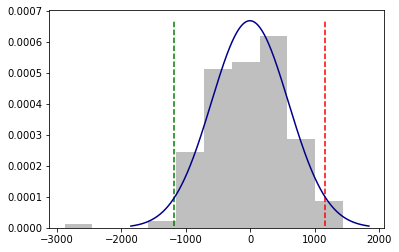

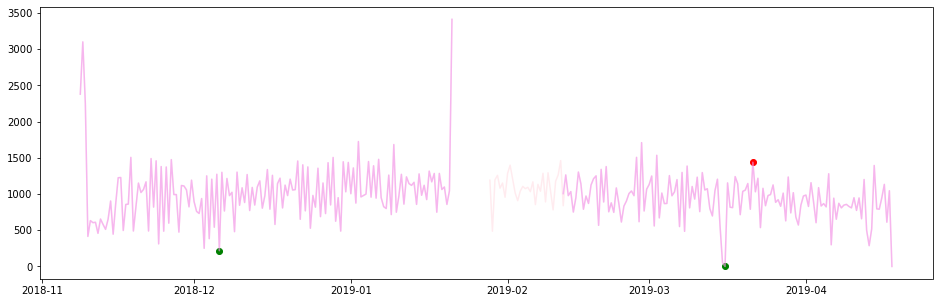

Cow n.6686 , col: ACTIVITY_LEVEL
(-915.9594723178526, 901.5475658585225)


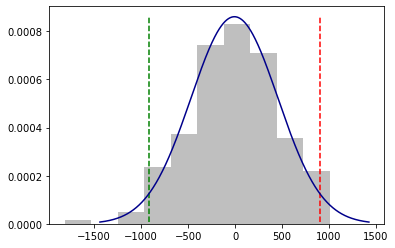

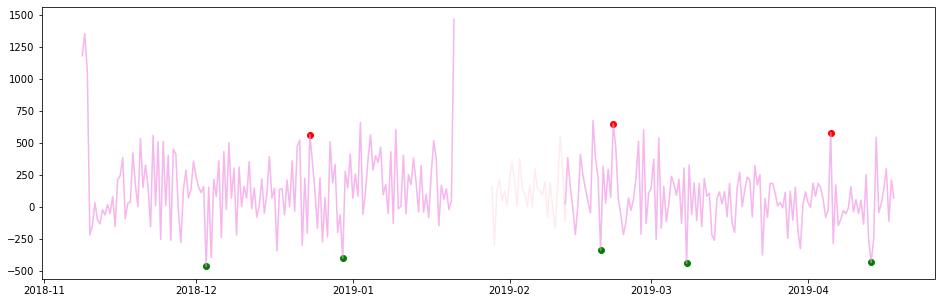

Cow n.6689 , col: WALK
(-1097.1169703203796, 1129.0916062047331)


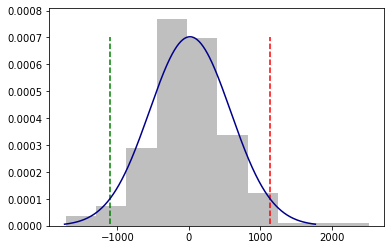

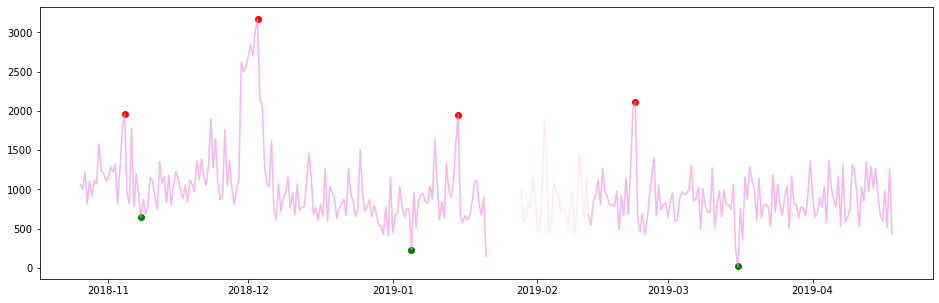

Cow n.6689 , col: SLEEP
(-1406.3860044206083, 1358.019442397391)


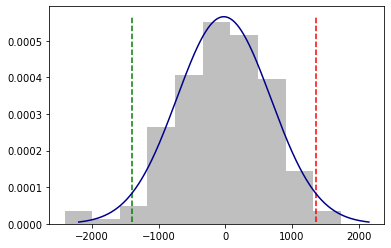

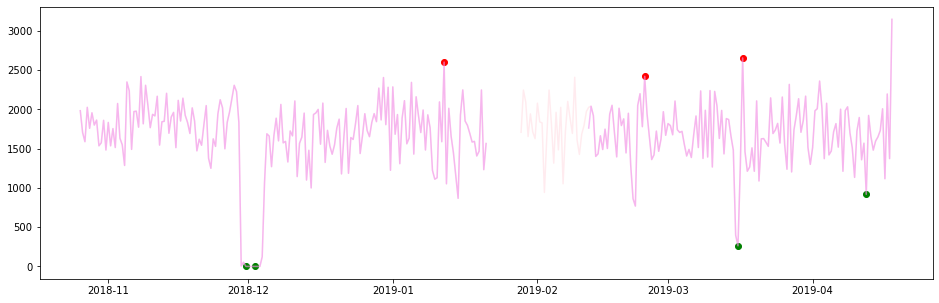

Cow n.6689 , col: EAT
(-833.5169612373801, 837.4786409608824)


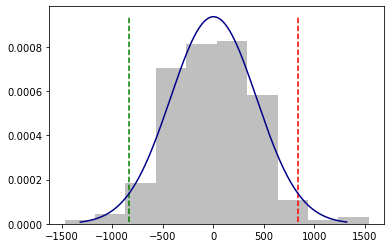

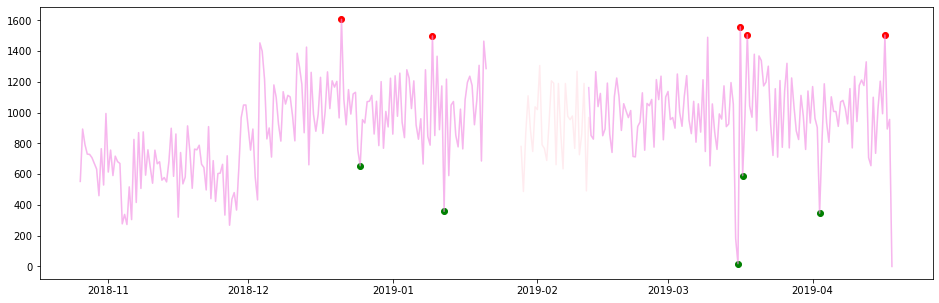

Cow n.6689 , col: ACTIVITY_LEVEL
(-652.7600944850182, 660.8593228931483)


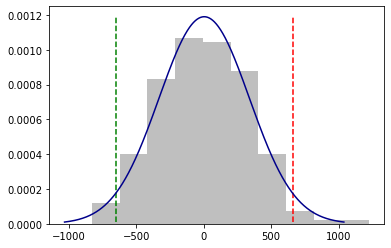

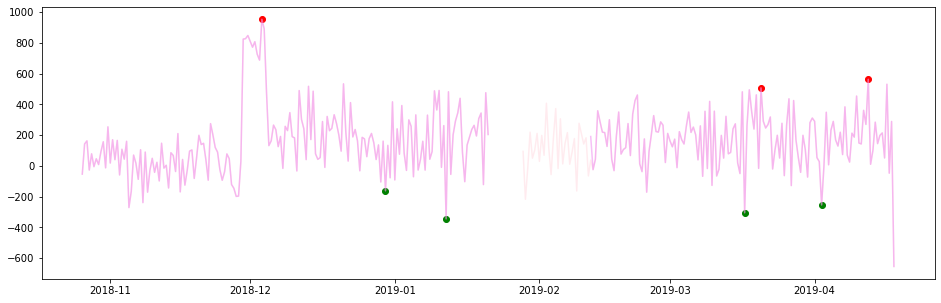

Cow n.6690 , col: WALK
(-731.1671240127134, 746.8259364246376)


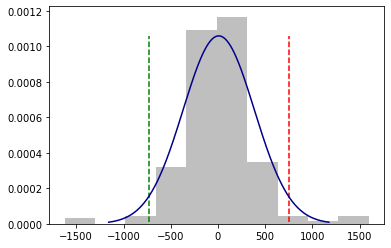

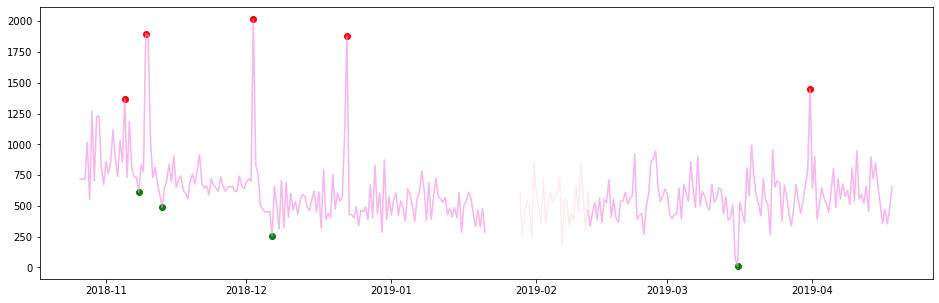

Cow n.6690 , col: SLEEP
(-1277.7249310109632, 1255.2336699701755)


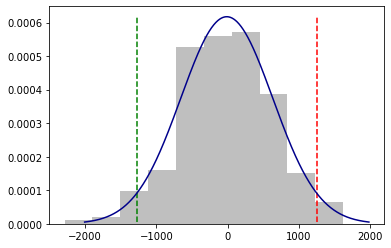

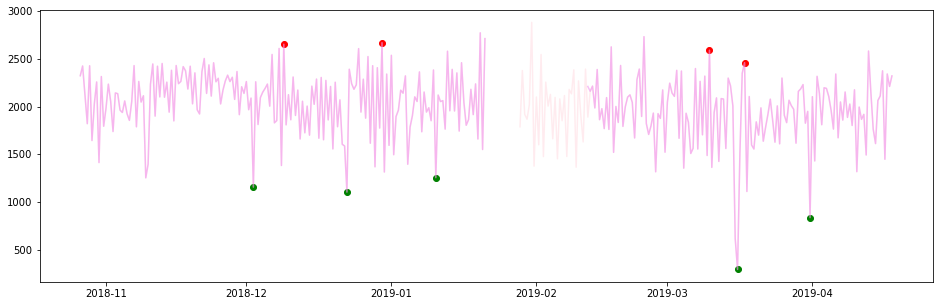

Cow n.6690 , col: EAT
(-949.610715069017, 960.1452407900572)


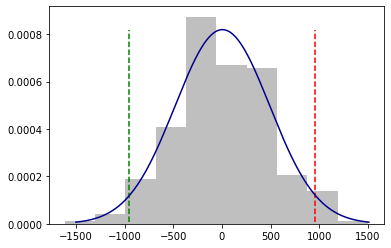

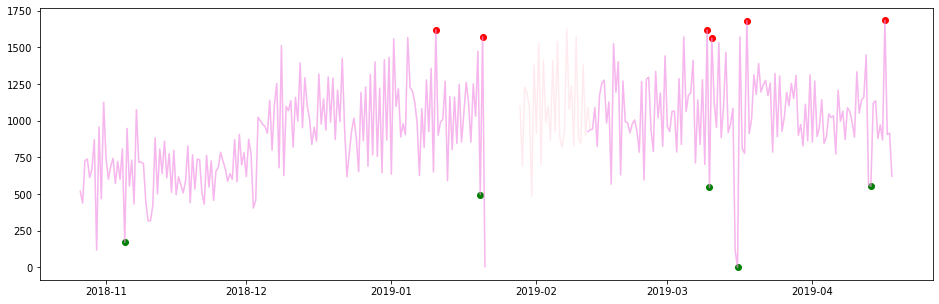

Cow n.6690 , col: ACTIVITY_LEVEL
(-674.5479628923833, 684.2084337603251)


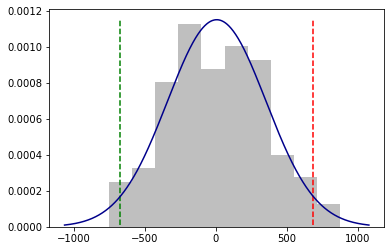

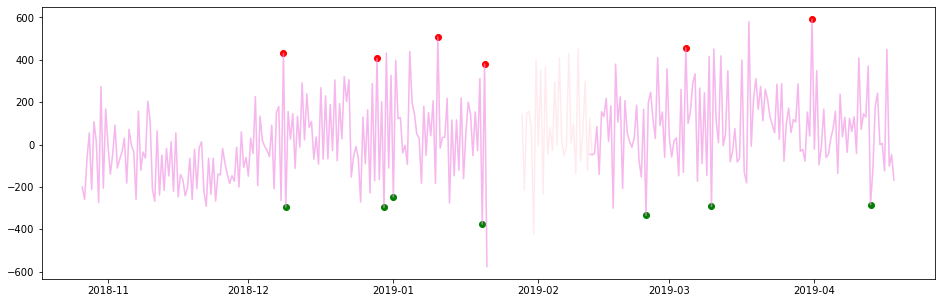

Cow n.6693 , col: WALK
(-1243.7261066261726, 1269.7698176762337)


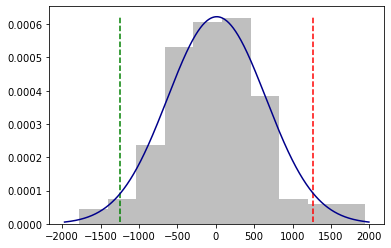

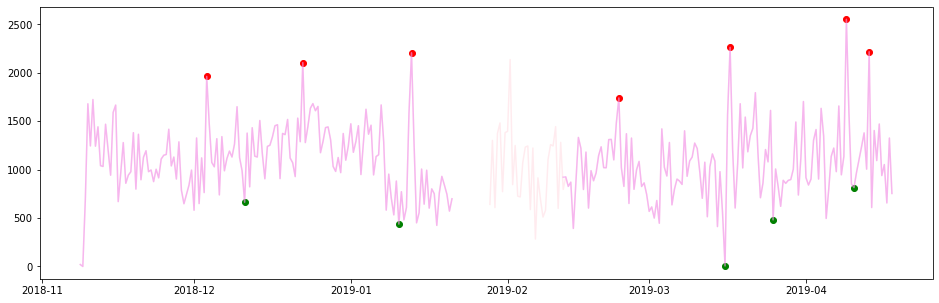

Cow n.6693 , col: SLEEP
(-1644.5206626269596, 1627.742648942749)


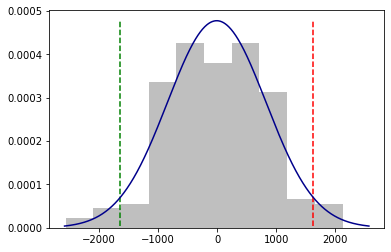

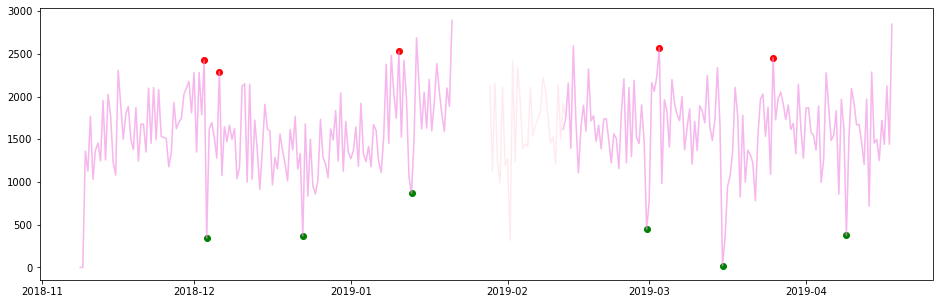

Cow n.6693 , col: EAT
(-850.8658694362545, 864.9695011112129)


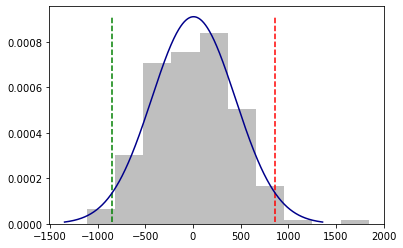

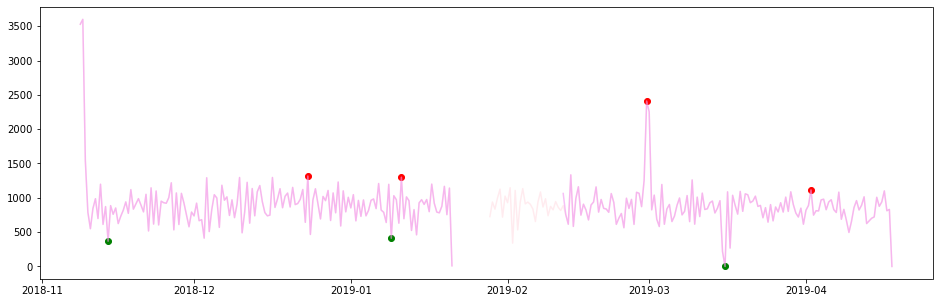

Cow n.6693 , col: ACTIVITY_LEVEL
(-765.0851678004777, 773.4501968697128)


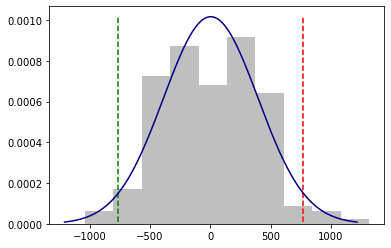

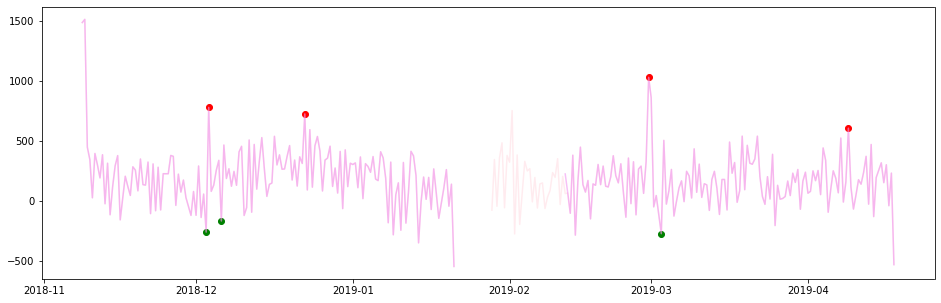

Cow n.6695 , col: WALK
(-1089.1400268222833, 1136.9534529391217)


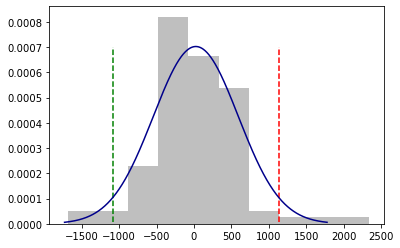

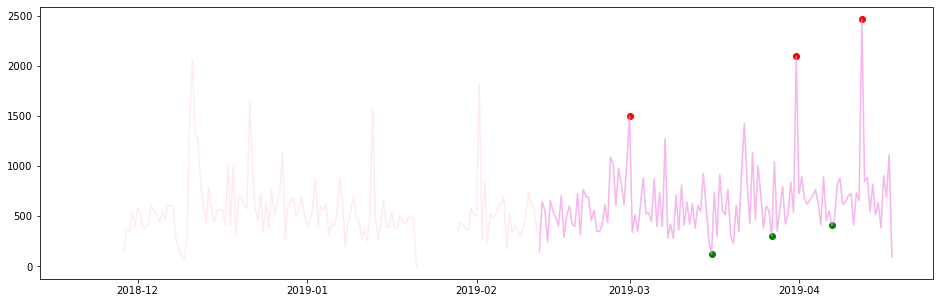

Cow n.6695 , col: SLEEP
(-1548.0155943826048, 1502.595572045835)


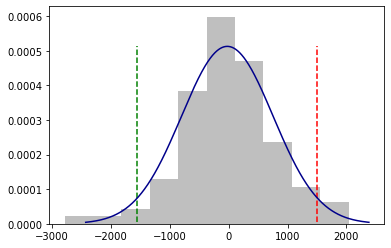

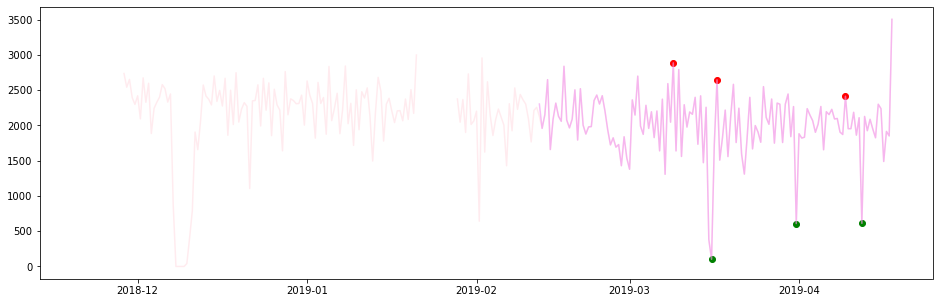

Cow n.6695 , col: EAT
(-856.7968263797557, 870.3840061550366)


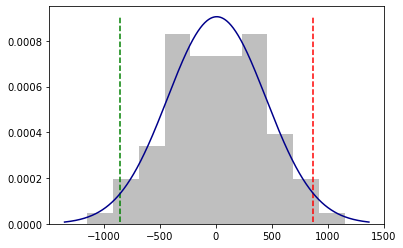

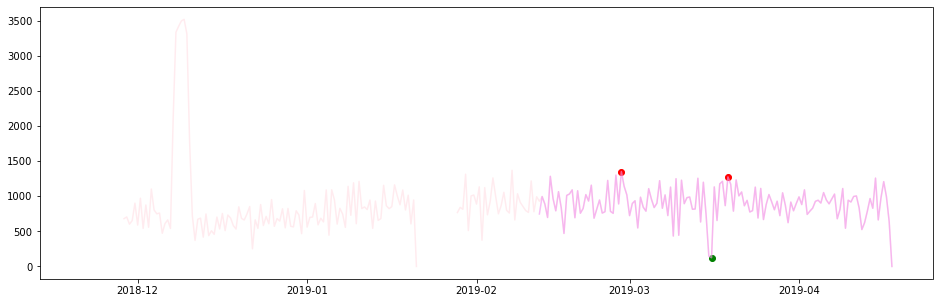

Cow n.6695 , col: ACTIVITY_LEVEL
(-697.0359460691845, 713.1278594551495)


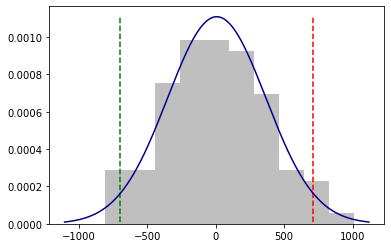

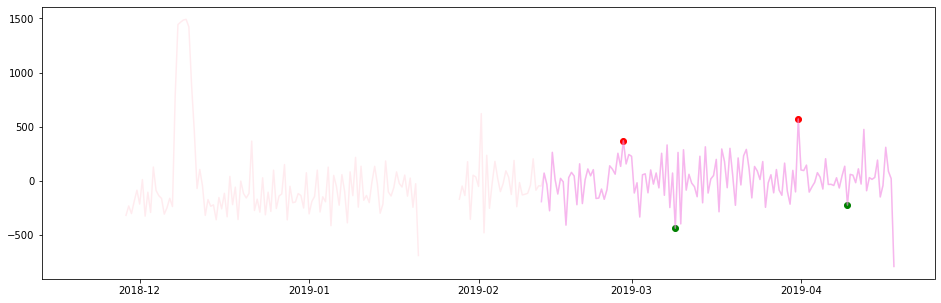

Cow n.6699 , col: WALK
(-718.4375749732335, 736.0424158157243)


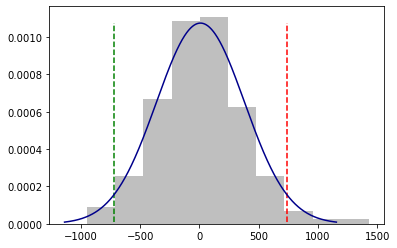

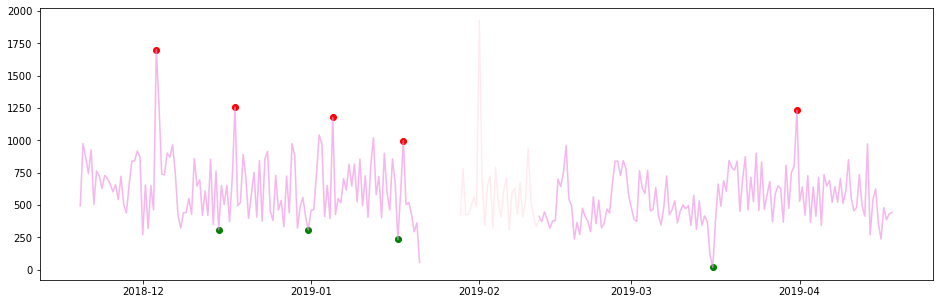

Cow n.6699 , col: SLEEP
(-1474.2693724804576, 1444.4320364112227)


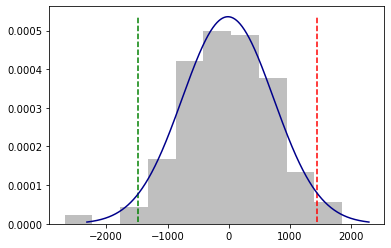

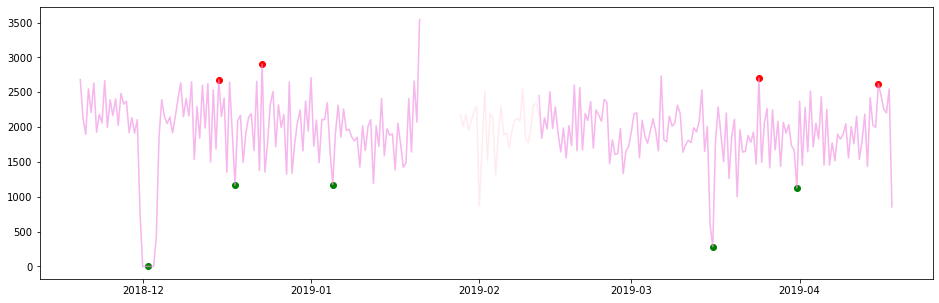

Cow n.6699 , col: EAT
(-1092.7908839069496, 1113.1121401860191)


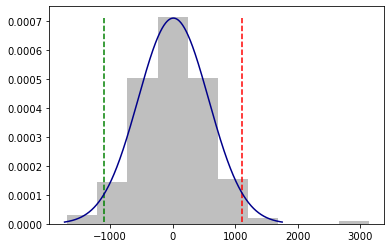

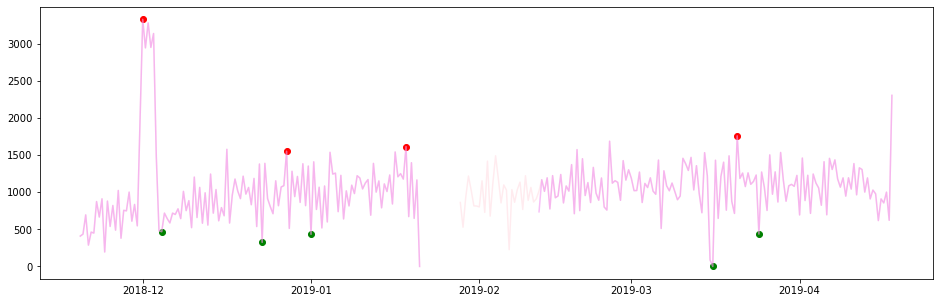

Cow n.6699 , col: ACTIVITY_LEVEL
(-805.3406183930864, 821.5691802631803)


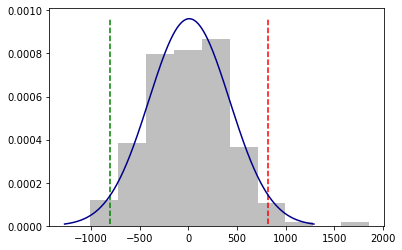

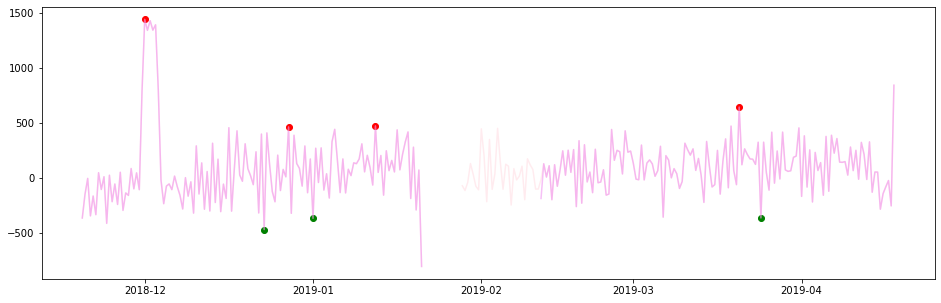

Cow n.6701 , col: WALK
(-1055.147553704527, 1066.3763566502632)


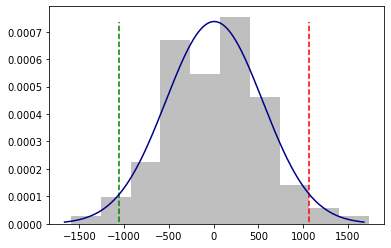

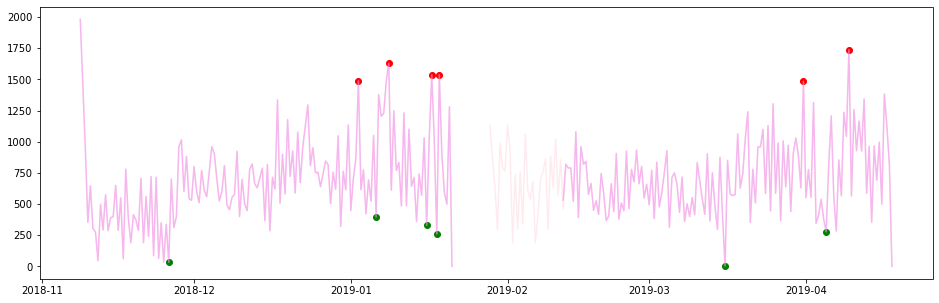

Cow n.6701 , col: SLEEP
(-1650.264489133663, 1639.2419442447742)


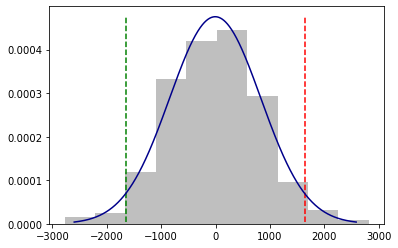

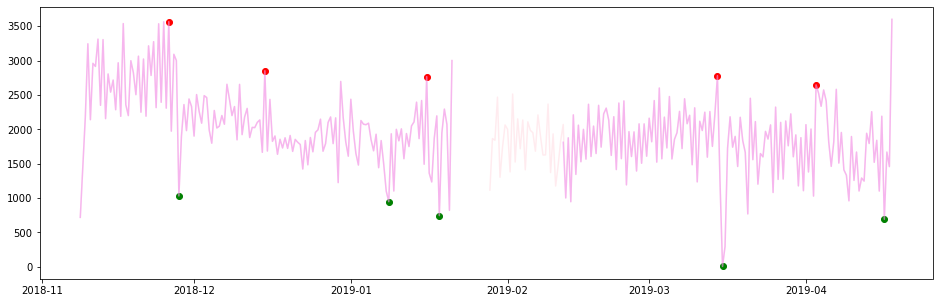

Cow n.6701 , col: EAT
(-1027.554866269785, 1038.1556568018661)


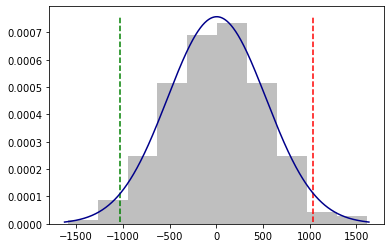

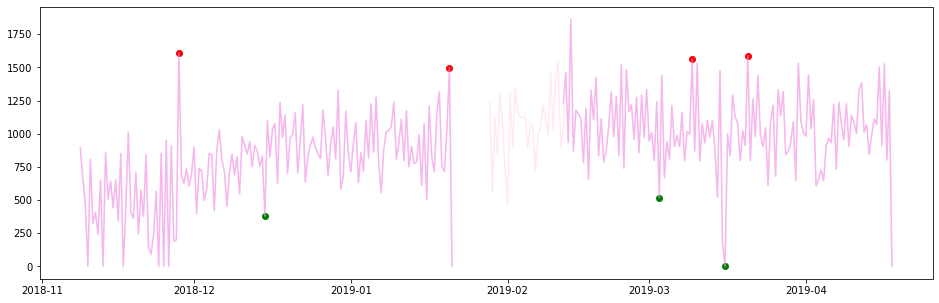

Cow n.6701 , col: ACTIVITY_LEVEL
(-863.8029171180741, 868.6090942714387)


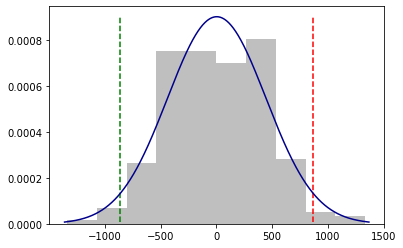

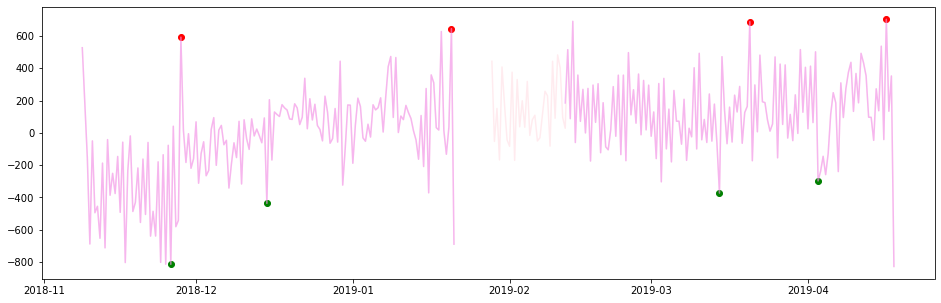

Cow n.6714 , col: WALK
(-1020.876659145176, 1030.966438288033)


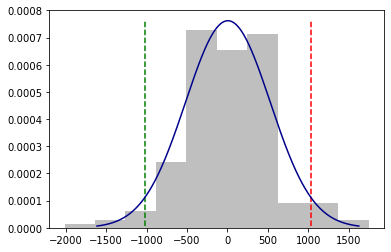

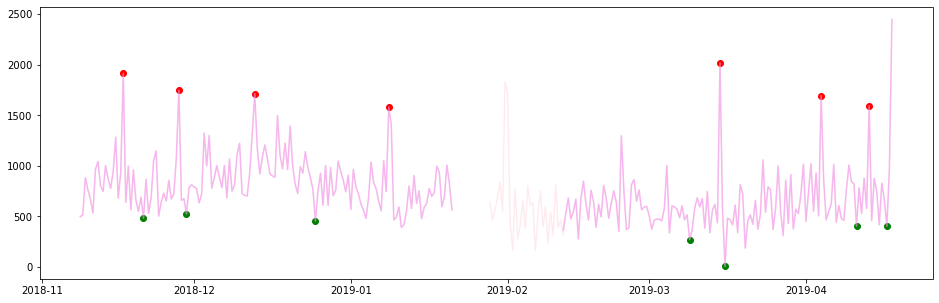

Cow n.6714 , col: SLEEP
(-1624.8532797152732, 1603.7382953788535)


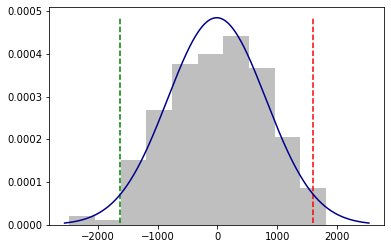

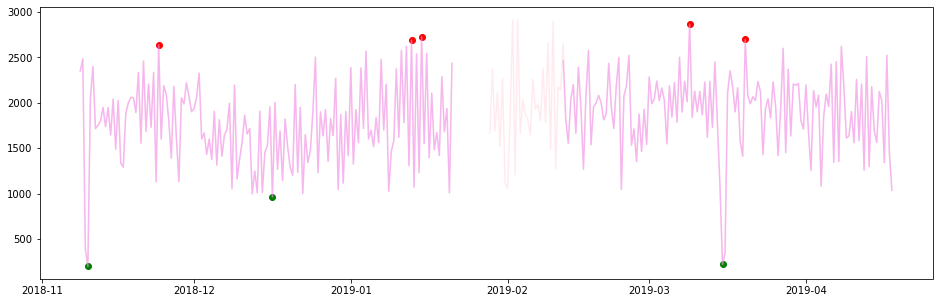

Cow n.6714 , col: EAT
(-1269.246046059935, 1292.5642759424609)


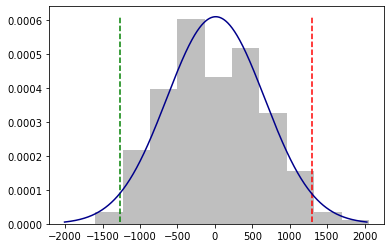

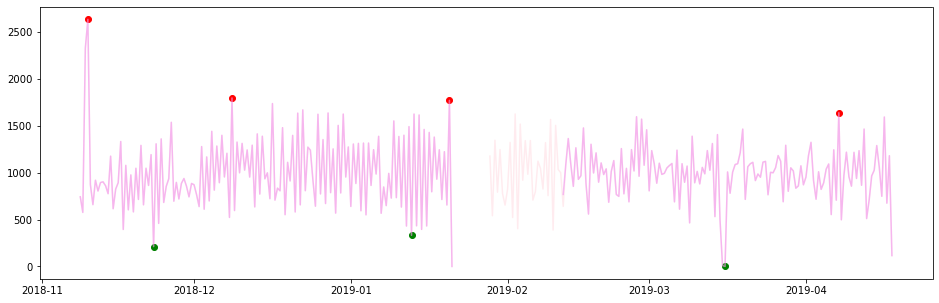

Cow n.6714 , col: ACTIVITY_LEVEL
(-890.0708148040342, 902.4339598995898)


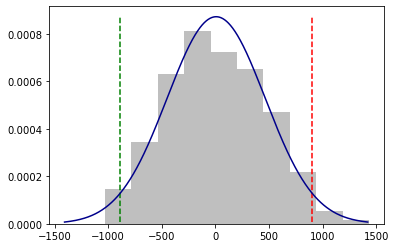

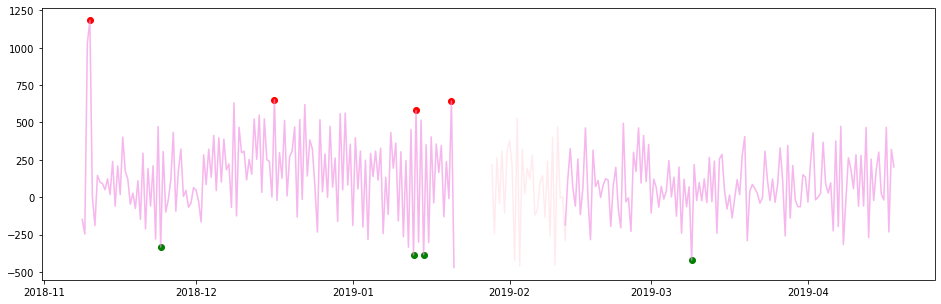

Cow n.6721 , col: WALK
(-1003.854473989966, 1013.6746197138716)


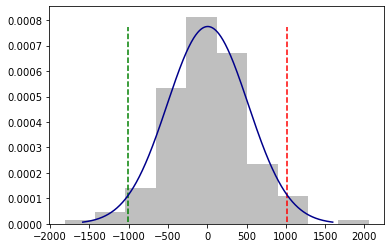

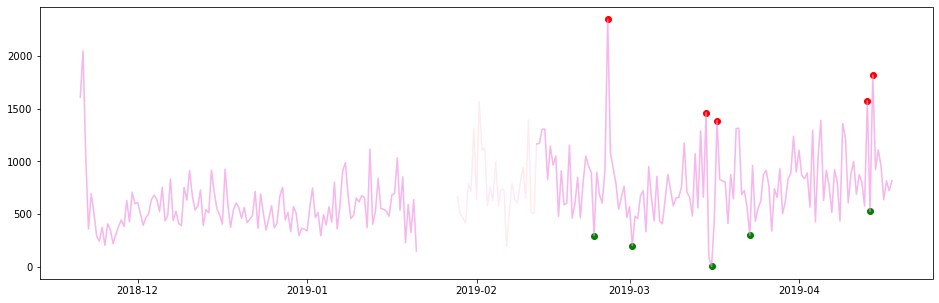

Cow n.6721 , col: SLEEP
(-1665.5064554595635, 1653.4261766876336)


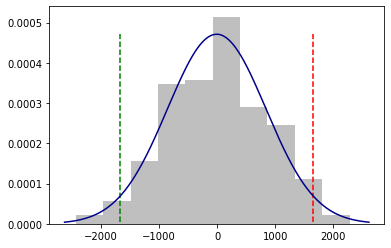

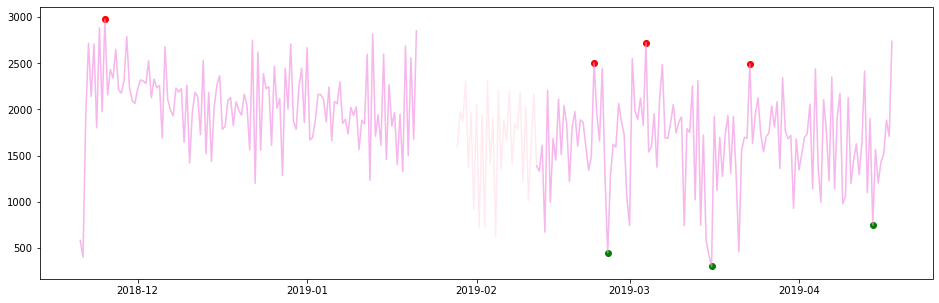

Cow n.6721 , col: EAT
(-1146.3042526052673, 1164.2013352335807)


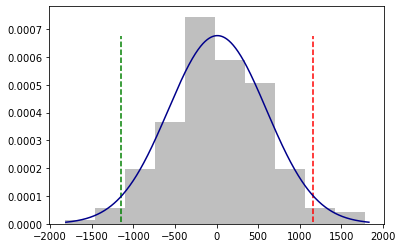

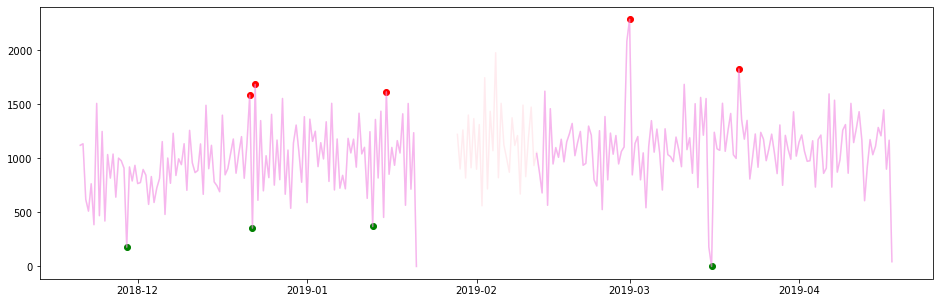

Cow n.6721 , col: ACTIVITY_LEVEL
(-895.8832301981993, 903.0011182551793)


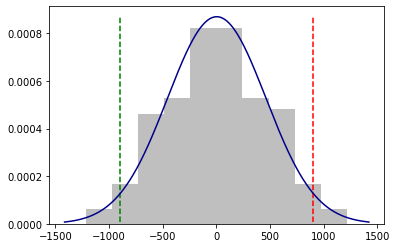

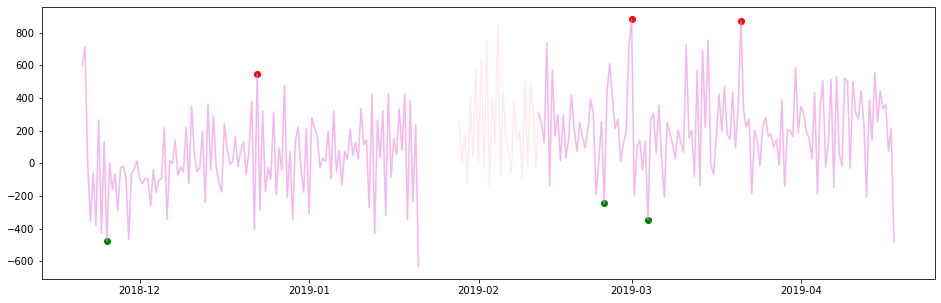

Cow n.6750 , col: WALK
(-773.126900277078, 789.7031161705488)


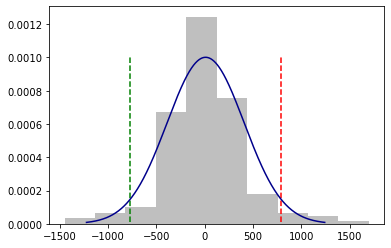

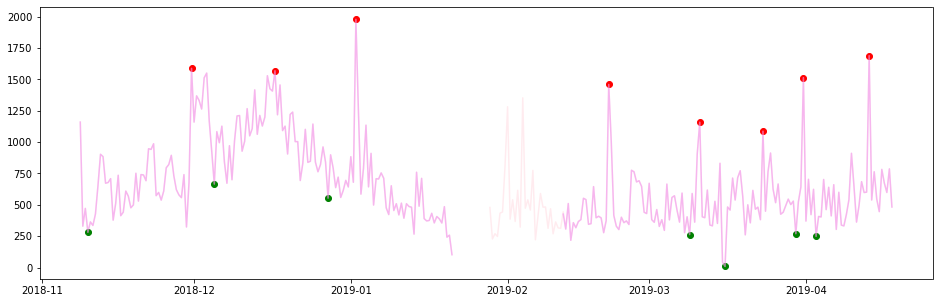

Cow n.6750 , col: SLEEP
(-1415.2137577009876, 1379.328368270093)


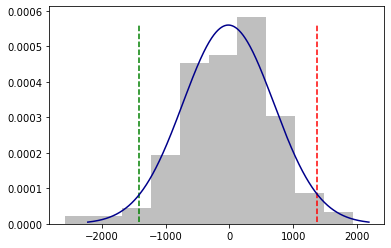

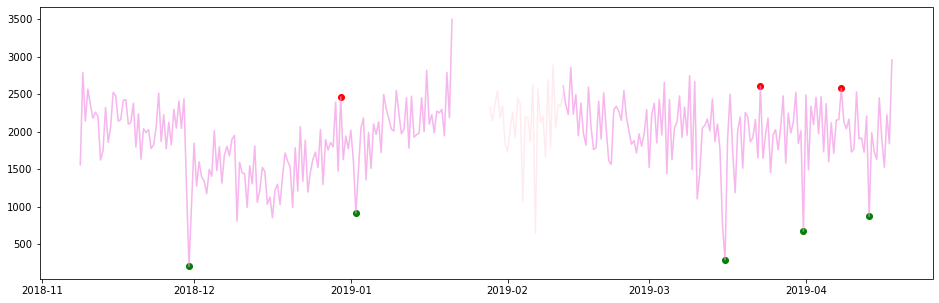

Cow n.6750 , col: EAT
(-1073.6564804731172, 1101.3328673394765)


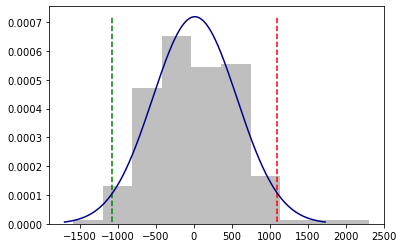

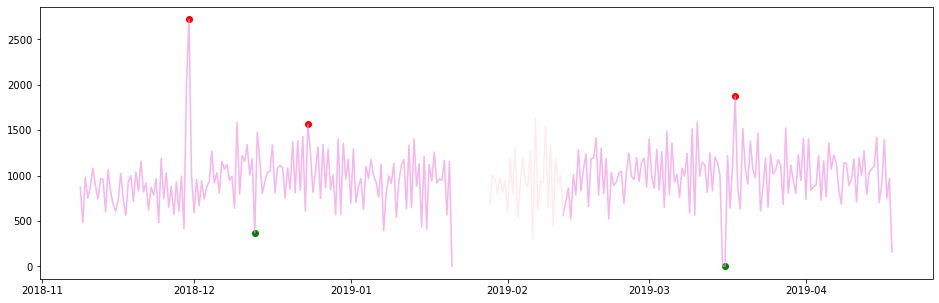

Cow n.6750 , col: ACTIVITY_LEVEL
(-742.2885333636158, 760.4467775964926)


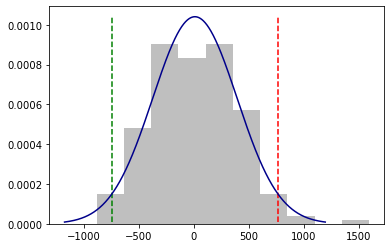

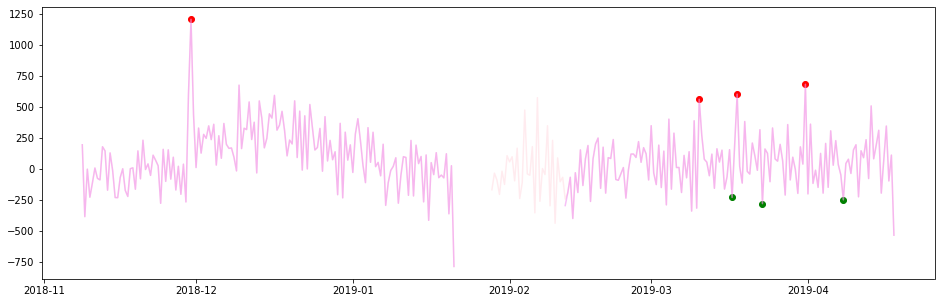

Cow n.7600 , col: WALK
(-587.1773422530055, 613.8794687080319)


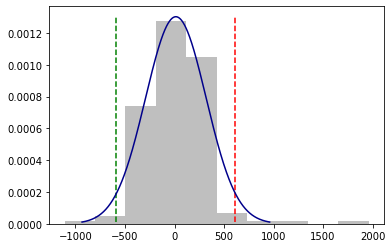

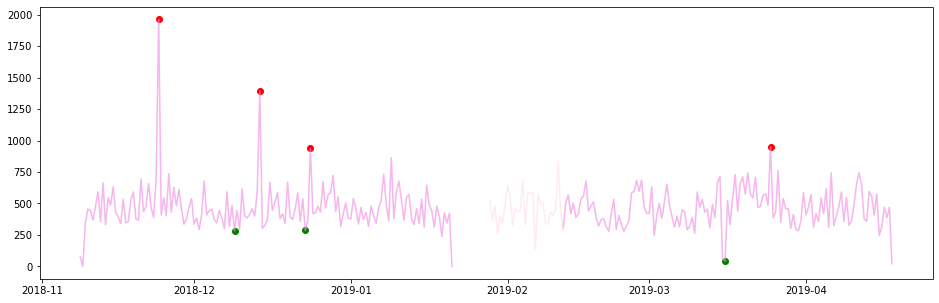

Cow n.7600 , col: SLEEP
(-1282.7917895108799, 1262.6882474138533)


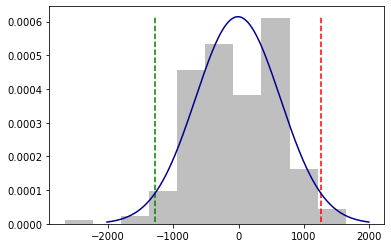

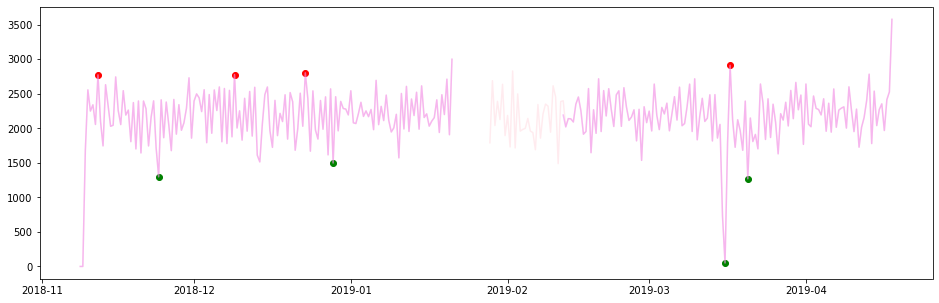

Cow n.7600 , col: EAT
(-1085.3466902792657, 1091.160417770137)


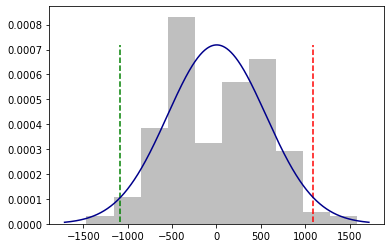

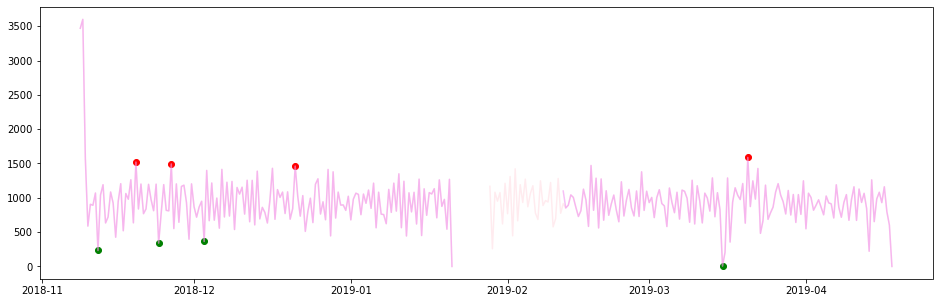

Cow n.7600 , col: ACTIVITY_LEVEL
(-717.7239639745404, 722.5523745879347)


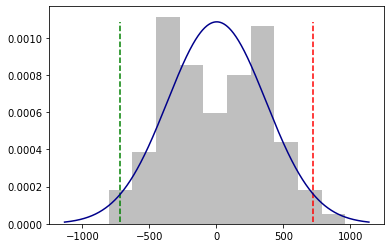

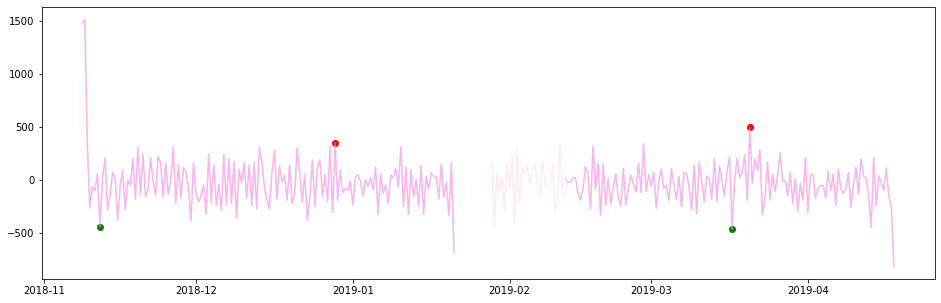

In [15]:
farm2CSV2cows(distance=12)